# **Trabajo Práctico N°1 - Aprendizaje Automático 1**

**Integrantes**:

Dito, Daniela

Flaibani, Marcela

López Crespo, facundo

In [537]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import math

# **Análisis Exploratorio**

**CRIM** (tasa de criminalidad per cápita por ciudad):

Representa la tasa de criminalidad en cada ciudad, medida como el número de crímenes per cápita. Una tasa más alta podría indicar un entorno menos seguro, lo que podría reducir el valor de las propiedades.

**ZN** (proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados):

Indica la proporción de terreno en una ciudad que está zonificado para grandes lotes residenciales. Un valor alto sugiere que hay muchas áreas con lotes grandes, lo que podría estar asociado con áreas residenciales de alta calidad.

**INDUS** (proporción de acres de negocios no minoristas por ciudad):

Mide la proporción de tierra en una ciudad que está dedicada a usos industriales o comerciales, excluyendo el comercio minorista. Un valor más alto puede indicar más desarrollo industrial, lo que puede influir en el valor de las propiedades residenciales.

**CHAS** (variable dummy del río Charles):

Es una variable binaria que indica si el tramo de la ciudad limita con el río Charles (1 si limita; 0 en caso contrario). La proximidad a cuerpos de agua a menudo aumenta el valor de las propiedades debido a la vista y el atractivo estético.

**NOX** (concentración de óxidos de nitrógeno en partes por 10 millones):

Representa la contaminación del aire en términos de concentración de óxidos de nitrógeno. Un valor más alto indica una mayor contaminación del aire, lo que puede tener un impacto negativo en los valores de las propiedades.

**RM**(número promedio de habitaciones por vivienda):

El número promedio de habitaciones en las viviendas de una ciudad. Las viviendas con más habitaciones suelen ser más caras, por lo que esta variable está positivamente correlacionada con el precio de las viviendas.

**AGE** (proporción de unidades ocupadas por sus propietarios construidas antes de 1940):

Mide el porcentaje de viviendas ocupadas por sus propietarios que fueron construidas antes de 1940. Un valor alto podría indicar que el stock de viviendas es más antiguo, lo que puede influir en el valor dependiendo de la condición y el mantenimiento de las viviendas.

**DIS**(distancias ponderadas a cinco centros de empleo de Boston):

Representa las distancias ponderadas a los principales centros de empleo en Boston. Las viviendas más cercanas a los centros de empleo suelen tener un valor más alto debido a la conveniencia y el acceso a oportunidades laborales.

**RAD** (índice de accesibilidad a las autopistas radiales):

Un índice que mide la accesibilidad a las principales autopistas radiales. Una mayor accesibilidad puede aumentar el valor de las propiedades debido a la conveniencia del transporte.

**TAX** (tasa de impuesto sobre la propiedad a valor completo por $10,000):

La tasa de impuesto sobre la propiedad medida en términos de valor completo por cada $10,000 de valor de la propiedad. Los impuestos más altos pueden disminuir el valor de las propiedades, ya que los compradores pueden estar menos dispuestos a pagar altos impuestos.

**PTRATIO** (proporción alumno-maestro por ciudad):

La proporción de alumnos por maestro en las escuelas de la ciudad. Una proporción menor (más maestros por alumno) suele estar asociada con una mejor calidad educativa, lo que puede incrementar el valor de las propiedades.

**B** (resultado de la ecuación B = 1000(Bk - 0.63)^2):

Aquí, Bk representa la proporción de la población negra en la ciudad. Esta variable transforma la proporción en una forma que puede tener una relación más clara con los precios de las viviendas, ya que un mayor valor de B podría estar asociado con ciertos patrones socioeconómicos y de vivienda.

**LSTAT** (% de población de menor estatus socioeconómico):

Representa el porcentaje de la población que pertenece a un estatus socioeconómico bajo. Un valor alto generalmente está asociado con un menor valor de las propiedades debido a las condiciones socioeconómicas de la comunidad.

**MEDV** (Mediana de la propiedad):

Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]

In [538]:
df = pd.read_csv('house-prices-tp.csv',sep=',')
df_house = df.copy()

In [539]:
print(df_house.head(20))

         CRIM         ZN      INDUS  CHAS       NOX     RM         AGE  \
0    0.071510   0.000000   4.490000   0.0  0.449000  6.121   56.800000   
1    0.082650   0.000000  13.920000   0.0  0.437000  6.127   18.400000   
2    0.128160  12.500000   6.070000   0.0  0.409000  5.885   33.000000   
3    0.088730  21.000000   5.640000   0.0  0.439000  5.963   45.700000   
4    0.114320   0.000000   8.560000   0.0  0.520000  6.781   71.300000   
5    0.062630   0.000000  11.930000   0.0  0.573000  6.593   69.100000   
6    0.358090   0.000000   6.200000   1.0  0.507000  6.951   88.500000   
7    0.088260   0.000000  10.810000   0.0  0.413000  6.417    6.600000   
8    1.354720   0.000000   8.140000   0.0  0.538000  6.072  100.000000   
9    0.303470   0.000000   7.380000   0.0  0.493000  6.312   28.900000   
10   0.034660  35.000000   6.060000   0.0  0.437900  6.031   23.300000   
11   0.228760   0.000000   8.560000   0.0  0.520000  6.405   85.400000   
12   0.435710   0.000000  10.590000   

In [540]:
print(f"\nInfo: {df_house.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB

Info: None


In [541]:
print(f"\nShape: {df_house.shape}")


Shape: (556, 14)


In [542]:
print(f"\nNulos: {df_house.isnull().sum()}")


Nulos: CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64


In [543]:
df_house.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  533.000000  534.000000  541.000000  533.000000  532.000000  535.000000   
mean     5.845517   13.197175   11.218725    0.090056    0.560050    6.291839   
std     13.828631   24.902981    6.942021    0.286531    0.119472    0.782403   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.084470    0.000000    5.130000    0.000000    0.453000    5.875500   
50%      0.315330    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      4.871410   20.000000   18.100000    0.000000    0.643986    6.638500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  532.000000  541.000000  528.000000  538.000000  528.000000  534.000000   
mean    67.632303    3.944102    9.699379  409.575089   18.429904  347.806040   
std     28.461925    2.255689    8.684495  167.689379    2.194759   99.636208   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     42.275000    2.112100    4.000000  279.000000   17.000000  369.530000   
50%     76.500000    3.340107    5.000000  335.000000   19.000000  390.815000   
75%     93.825000    5.400700   23.632660  666.000000   20.200000  395.890000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  534.000000  535.000000  
mean    13.028092   22.746809  
std      7.579972    9.491452  
min      1.730000    5.000000  
25%      7.150000   16.750000  
50%     11.465000   21.200000  
75%     17.205000   26.300000  
max     37.970000   50.000000

Se eliminan las 21 filas con la variable a predecir (MEDV) nula.

Quedan 535 filas.

In [544]:
df_house = df_house.dropna(subset=['MEDV'])
print(f"\nNulos: {df_house.isnull().sum()}")
print(f"\nShape: {df_house.shape}")
df_house = df_house.reset_index(drop=True)


Nulos: CRIM       11
ZN         11
INDUS       4
CHAS        9
NOX         9
RM          7
AGE        11
DIS         5
RAD        12
TAX         9
PTRATIO     9
B           9
LSTAT       9
MEDV        0
dtype: int64

Shape: (535, 14)


Ninguna columna o serie está completa.

### Se divide el dataset en train/test

In [545]:
X = df_house.drop('MEDV', axis=1)
y = df_house['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12,)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((428, 13), (107, 13), (428,), (107,))

Se separa el dataset(535,14) en :

* Conjunto de entrenamiento: X_train(428,13); y_train(428,)

* Conjunto de testeo: X_test(107,13); y_test(107,)

In [546]:
X_train

CRIM         ZN      INDUS  CHAS       NOX        RM      AGE  \
0    32.504013   6.528591   8.937346   1.0       NaN  4.016588      NaN   
1     0.036150  80.000000   4.950000   0.0  0.411000  6.630000  23.4000   
2     0.101530   0.000000  12.830000   0.0  0.437000  6.279000  74.5000   
3     0.590050   0.000000  21.890000   0.0  0.624000  6.372000  97.9000   
4     0.289550   0.000000  10.590000   0.0  0.489000  5.412000   9.8000   
..         ...        ...        ...   ...       ...       ...      ...   
423   0.141030   0.000000  13.920000   0.0  0.437000  5.790000  58.0000   
424  38.608079  59.561339  15.551495   1.0  0.590357  3.839536  20.2995   
425   0.057350   0.000000   4.490000   0.0  0.449000  6.630000  56.1000   
426   0.330450   0.000000   6.200000   0.0  0.507000  6.086000  61.5000   
427   0.020550  85.000000   0.740000   0.0  0.410000  6.383000  35.7000   

          DIS        RAD         TAX    PTRATIO           B      LSTAT  
0    5.243777  20.416908  197.236588  19.639059    6.267059   7.033962  
1    5.116700   4.000000  245.000000  19.200000  396.900000   4.700000  
2    4.052200   5.000000  398.000000  18.700000  373.660000  11.970000  
3    2.327400   4.000000  437.000000  21.200000  385.760000  11.120000  
4    3.587500   4.000000  277.000000  18.600000  348.930000  29.550000  
..        ...        ...         ...        ...         ...        ...  
423  6.320000   4.000000  289.000000  16.000000  396.900000  15.840000  
424  2.901248  21.900776  593.195516        NaN  123.454526   3.389871  
425  4.437700   3.000000  247.000000  18.500000  392.300000   6.530000  
426  3.651900   8.000000  307.000000  17.400000  376.750000  10.880000  
427  9.187600   2.000000  313.000000  17.300000  396.900000   5.770000  

[428 rows x 13 columns]

In [547]:
print(X_train.head())

        CRIM         ZN      INDUS  CHAS    NOX        RM   AGE       DIS  \
0  32.504013   6.528591   8.937346   1.0    NaN  4.016588   NaN  5.243777   
1   0.036150  80.000000   4.950000   0.0  0.411  6.630000  23.4  5.116700   
2   0.101530   0.000000  12.830000   0.0  0.437  6.279000  74.5  4.052200   
3   0.590050   0.000000  21.890000   0.0  0.624  6.372000  97.9  2.327400   
4   0.289550   0.000000  10.590000   0.0  0.489  5.412000   9.8  3.587500   

         RAD         TAX    PTRATIO           B      LSTAT  
0  20.416908  197.236588  19.639059    6.267059   7.033962  
1   4.000000  245.000000  19.200000  396.900000   4.700000  
2   5.000000  398.000000  18.700000  373.660000  11.970000  
3   4.000000  437.000000  21.200000  385.760000  11.120000  
4   4.000000  277.000000  18.600000  348.930000  29.550000  


In [548]:
print(f"\nInfo: {X_train.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     418 non-null    float64
 1   ZN       418 non-null    float64
 2   INDUS    425 non-null    float64
 3   CHAS     420 non-null    float64
 4   NOX      421 non-null    float64
 5   RM       423 non-null    float64
 6   AGE      419 non-null    float64
 7   DIS      424 non-null    float64
 8   RAD      418 non-null    float64
 9   TAX      420 non-null    float64
 10  PTRATIO  419 non-null    float64
 11  B        422 non-null    float64
 12  LSTAT    420 non-null    float64
dtypes: float64(13)
memory usage: 43.6 KB

Info: None


In [549]:
print(f"\nShape: {X_train.shape}")


Shape: (428, 13)


In [550]:
print(f"\nNulos: {X_train.isnull().sum()}")


Nulos: CRIM       10
ZN         10
INDUS       3
CHAS        8
NOX         7
RM          5
AGE         9
DIS         4
RAD        10
TAX         8
PTRATIO     9
B           6
LSTAT       8
dtype: int64


In [551]:
X_train.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  418.000000  418.000000  425.000000  420.000000  421.000000  423.000000   
mean     4.746050   12.745869   11.103609    0.080952    0.557095    6.282653   
std     11.520978   24.330089    6.890949    0.273087    0.117324    0.767554   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.079870    0.000000    5.130000    0.000000    0.449000    5.878500   
50%      0.289575    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.846485   20.000000   18.100000    0.000000    0.631000    6.635000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD        TAX     PTRATIO           B  \
count  419.000000  424.000000  418.000000  420.00000  419.000000  422.000000   
mean    67.374320    3.922094    9.543152  407.41657   18.397872  349.951773   
std     28.447116    2.263826    8.602105  167.24839    2.238422   97.268258   
min      2.900000    1.129600    1.000000  187.00000   12.600000    0.320000   
25%     42.150000    2.109150    4.000000  277.00000   16.900000  370.742500   
50%     76.500000    3.267450    5.000000  336.00000   19.000000  390.815000   
75%     93.700000    5.315650   21.529809  666.00000   20.200000  395.690000   
max    100.000000   12.126500   24.000000  711.00000   22.000000  396.900000   

            LSTAT  
count  420.000000  
mean    12.847489  
std      7.560816  
min      1.730000  
25%      6.990000  
50%     11.170000  
75%     16.739301  
max     37.970000

Se eliminan las filas que tengan más de 6 valores nulos en el conjunto de entrenamiento.

In [552]:
i_filas_incompletas = X_train[X_train.isna().sum(axis=1) > 6].index

# Borrar las filas en X_train que tienen más de 6 valores nulos
X_train = X_train.drop(index=i_filas_incompletas)

# Borrar las mismas filas en y_train
y_train = y_train.drop(index=i_filas_incompletas)

El dataset original tiene 556 filas.

Se eliminaron 21 filas con la variable MEDV nula, quedando 535 filas.

En el conjunto de entrenamiento de 428 filas, se eliminaron 6 con más de 6 valores nulos, quedando 422.

No se debe eliminar más del 5% de los datos, que serían 28 datos, por lo que se analiza como imputar los datos faltantes restantes.

In [553]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

### Análisis del comportamiento de las variables

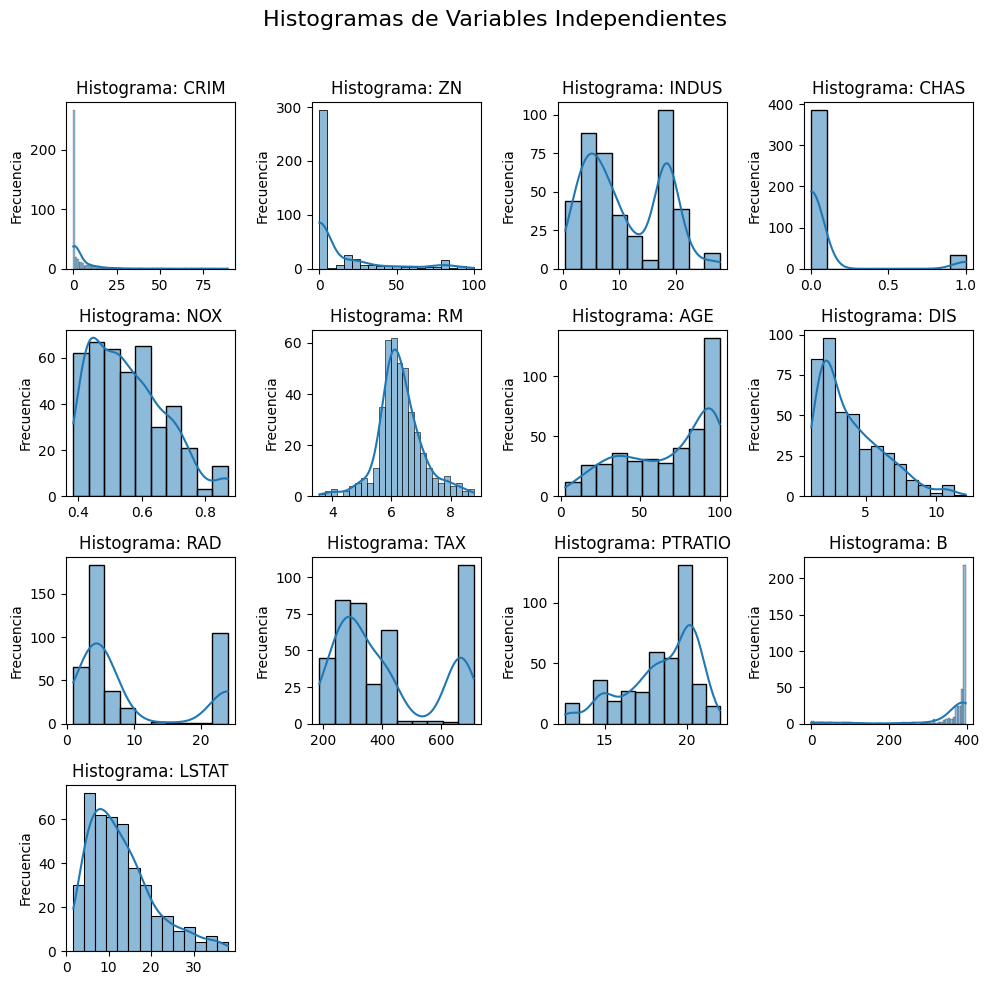

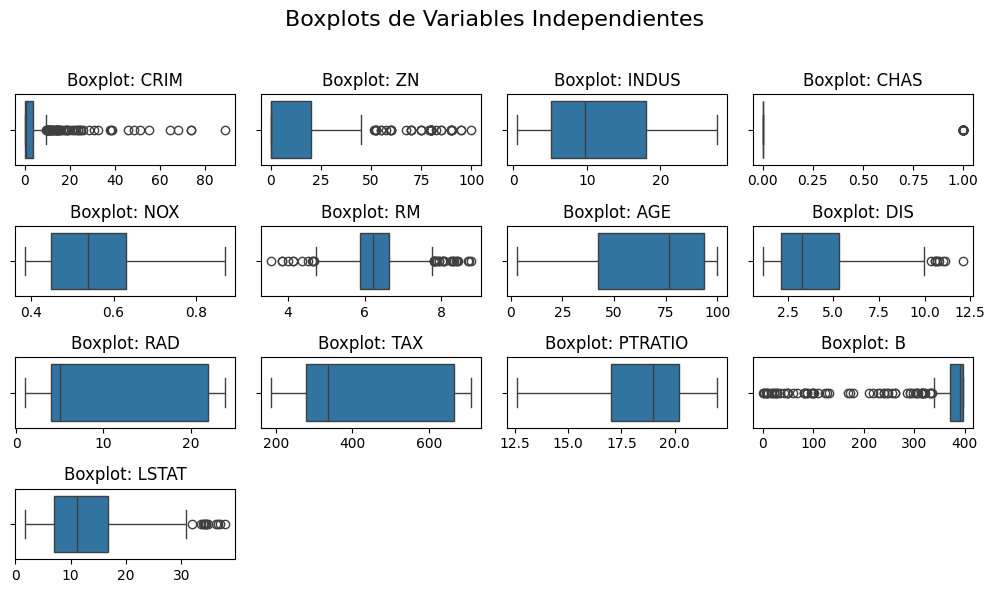

In [554]:
# Obtener nombres de las columnas (excluyendo el target)
independent_vars = X_train.columns

# Número de variables
num_vars = len(independent_vars)

# Calcular el número de filas y columnas necesario para el grid
cols = 4  # Fijas 4 columnas
rows = np.ceil(num_vars / cols).astype(int)  # Calcular número mínimo de filas necesarias

# Crear una figura con múltiples subgráficas para histogramas
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
fig.suptitle('Histogramas de Variables Independientes', fontsize=16)

for i, col in enumerate(independent_vars):
    ax = axes[i // cols, i % cols]
    sns.histplot(data=X_train, x=col, kde=True, ax=ax)
    ax.set_title(f'Histograma: {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

# Eliminar subplots vacíos si es necesario
if num_vars < rows * cols:
    for j in range(num_vars, rows * cols):
        fig.delaxes(axes.flatten()[j])

# Ajustar la disposición de los subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Crear una figura con múltiples subgráficas para boxplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
fig.suptitle('Boxplots de Variables Independientes', fontsize=16)

for i, col in enumerate(independent_vars):
    ax = axes[i // cols, i % cols]
    sns.boxplot(data=X_train, x=col, ax=ax)
    ax.set_title(f'Boxplot: {col}')
    ax.set_xlabel('')

# Eliminar subplots vacíos si es necesario
if num_vars < rows * cols:
    for j in range(num_vars, rows * cols):
        fig.delaxes(axes.flatten()[j])

# Ajustar la disposición de los subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Correlaciones

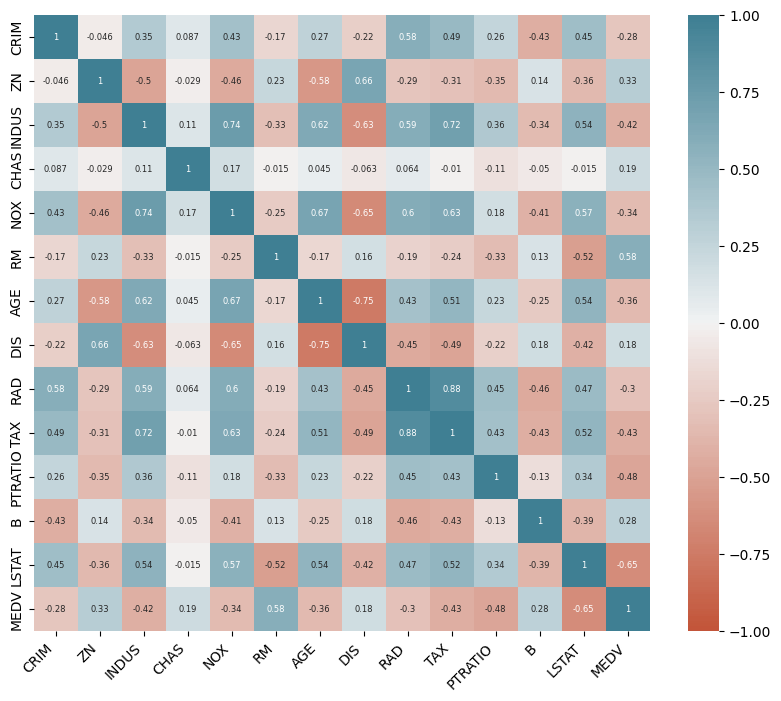

In [555]:
plt.figure(figsize=(10, 8))
corr = df_train.corr(method = 'pearson')
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

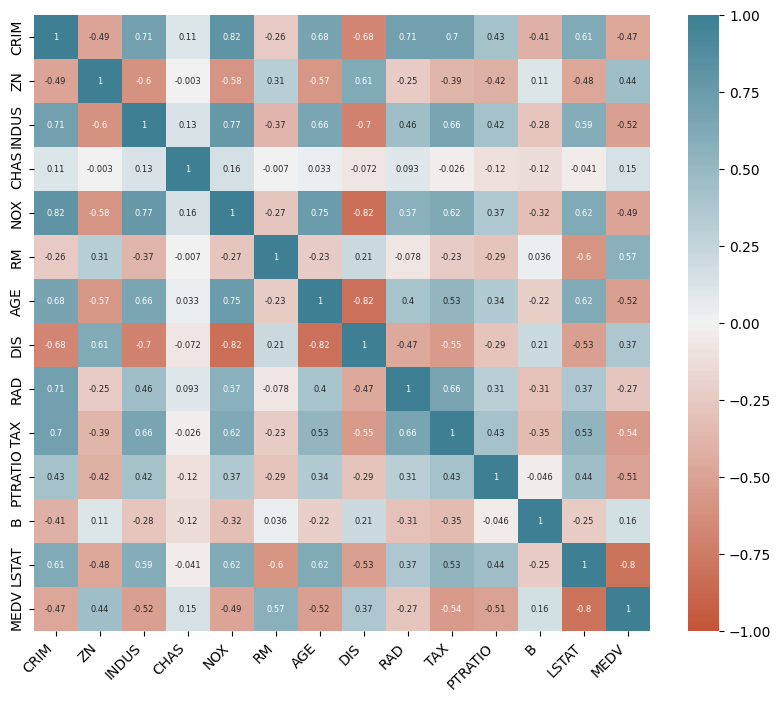

In [556]:
plt.figure(figsize=(10, 8))
corr = df_train.corr(method = 'spearman')
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [557]:
corr=corr.drop('MEDV')

#### Correlación entre MEDV y las variables predictivas

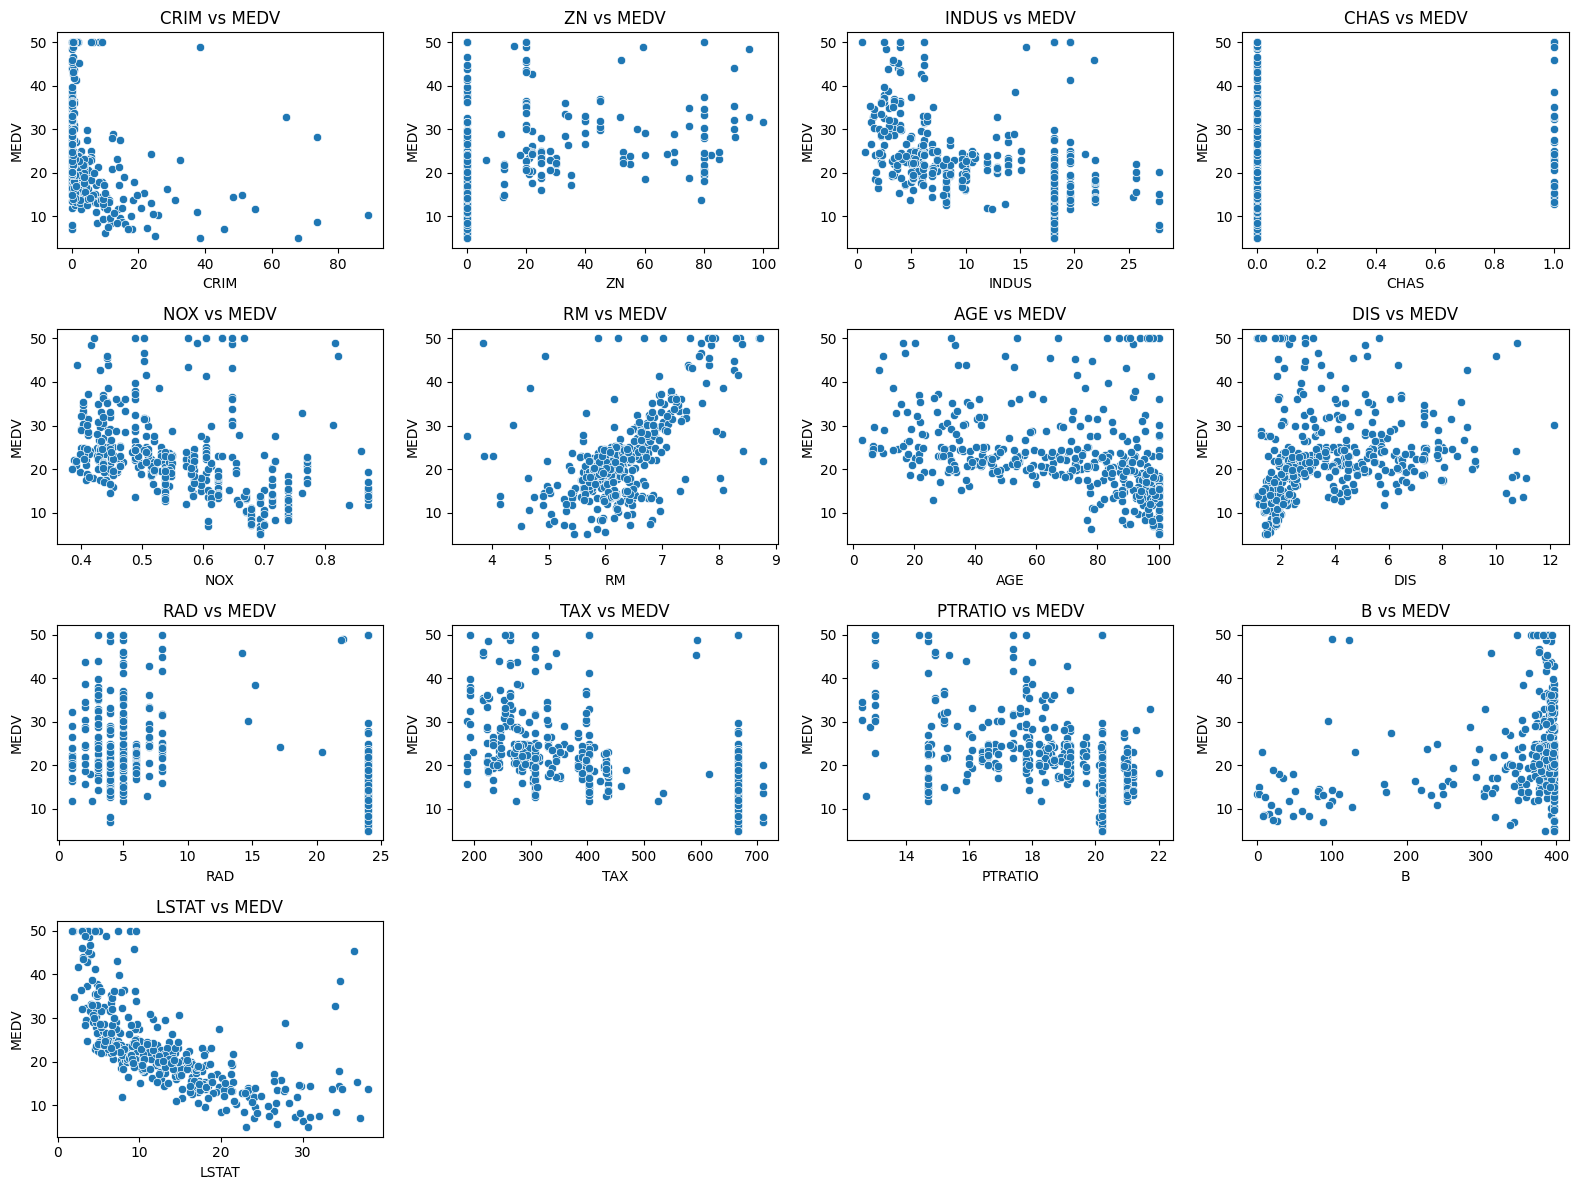

In [558]:
columnas = [col for col in df_train.columns if col != 'MEDV']

n_rows = 4
n_cols = 4

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))

# Aplanar los ejes para recorrerlos en un solo bucle
axes = axes.flatten()

# Graficar cada variable de 'columnas' frente a 'MEDV'
for i, col in enumerate(columnas):
    sns.scatterplot(data=df_train, x=col, y='MEDV', ax=axes[i])
    axes[i].set_title(f'{col} vs MEDV')

# Eliminar subplots vacíos si hay más subplots que columnas
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Ajustar el espaciado
plt.tight_layout()
plt.show()


#### Correlación entre las variables predictivas

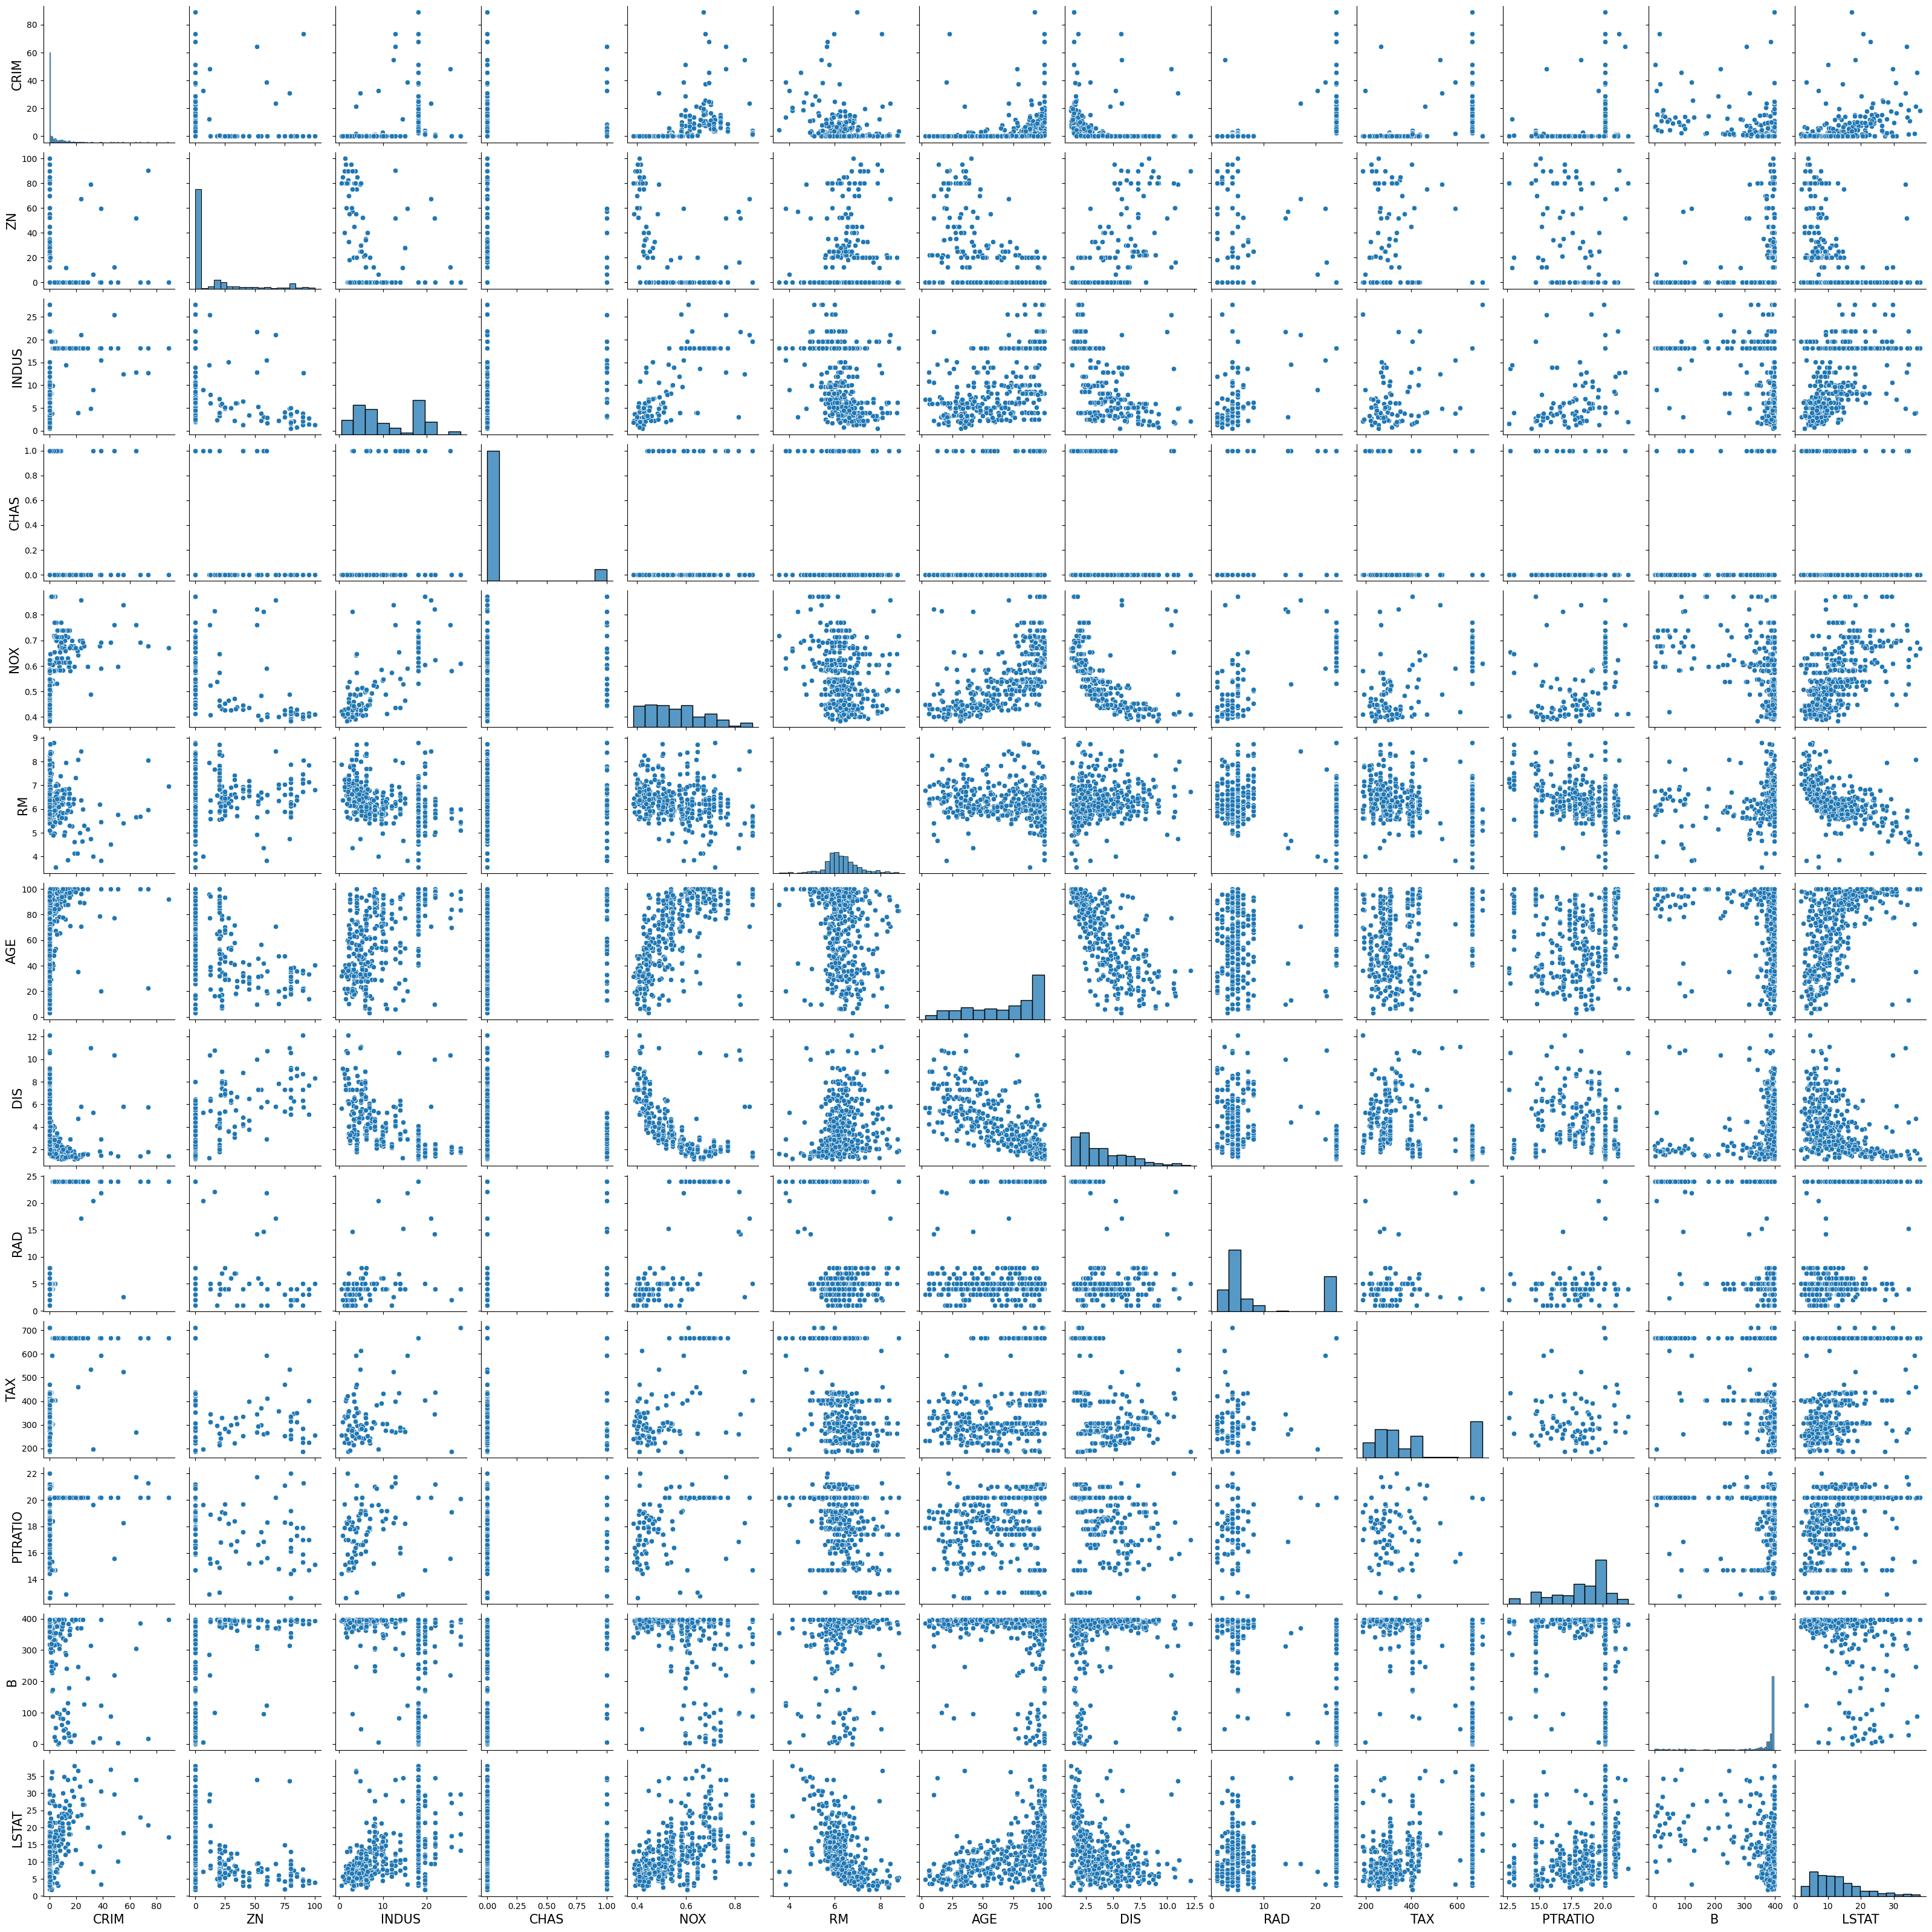

In [559]:
pairplot = sns.pairplot(X_train)

for ax in pairplot.axes.flatten():
    # Aumentar el tamaño de las etiquetas de los ejes x e y
    ax.set_xlabel(ax.get_xlabel(), fontsize=15)
    ax.set_ylabel(ax.get_ylabel(), fontsize=15)
    # Aumentar el tamaño de las etiquetas de los ticks
    ax.tick_params(axis='both', labelsize=10)

plt.show()

El valor medio de la propiedad (variable target MEDV) muestra:
* Una visible relación directa con el número de habitaciones por vivienda (RM).
* Una visible relación inversa con el porcentaje de población con menor status socioeconómico (LSTAT).
Esto se observa gráficamente y se verifica con los valores de la matriz de correlación.

Se evalúan las correlaciones de Pearson y Spearman. Los resultados no se contradicen pero los coeficientes difieren.

Si bien el método de correlación de Spearman es más robusto y recomendado en datasets con presencia de outliers significativa, nuestras decisiones se basan en los resultados de la correlación de Pearson, ya que se buscan condiciones de linealidad por sobre las de monotonía.

**Correlaciones entre las variables independientes**

* CRIM directa con RAD TAX LSTAT - inversa con B
* ZN   directa con DIS - inversa con AGE INDUS NOX
* INDUS directa NOX TAX AGE RAD LSTAT- inversa con DIS ZN
* NOX directa con INDUS AGE TAX LSTAT - inversa con DIS ZN
* RM inversa con LSTAT
* AGE directa con INDUS LSTAT TAX - inversa con DIS ZN
* DIS directa con ZN - inversa con AGE NOX INDUS TAX
* RAD directa con TAX NOX INDUS CRIM - (inversa con B DIS)
* TAX directa con RAD INDUS NOX LSTAT AGE CRIM - inversa con
* PTRATIO directa con  - inversa con DIS B
* B directa con  - inversa con
* LSTAT directa con  NOX INDUS TAX - inversa con RM

#### Valores Nulos

In [560]:
print(f"\nNulos: {X_train.isnull().sum()}")


Nulos: CRIM       6
ZN         6
INDUS      1
CHAS       3
NOX        4
RM         2
AGE        5
DIS        2
RAD        7
TAX        5
PTRATIO    5
B          3
LSTAT      4
dtype: int64


#### Outliers

In [561]:
def outliers(df, serie):
  q_low = df[serie].quantile(0.03)
  q_hi  = df[serie].quantile(0.97)
  df_outliers = df[(df[serie] > q_hi) | (df[serie] < q_low)]

  print(serie, len(df_outliers))
  return

for col in X_train.columns:
  outliers(X_train, col)

CRIM 26
ZN 11
INDUS 23
CHAS 0
NOX 25
RM 26
AGE 13
DIS 26
RAD 0
TAX 18
PTRATIO 8
B 13
LSTAT 25


Se observan una importante cantidad de valores atípicos en la mayoría de las variables explicativas.

# **Opción 1**
* Los valores faltantes se imputan:
  * CHAS a la moda por ser una variable categórica.
  * RM a la media por tener una distribución casi normal.
  * CRIM, ZN, NOX, DIS, B y LSTAT a la mediana por tener distribuciones sesgadas.
  * INDUS, AGE, RAD, TAX Y PTRATIO mediante KNN por tener distribuciones bimodales. No se aplica KNN a todas las variables debido al costo computacional que implica.
* No se da ningún tratamiento a los outliers.
* Se utiliza el escalado robusto.

In [562]:
X_train_op1 = X_train.copy()
y_train_op1 = y_train.copy()
X_test_op1 = X_test.copy()
y_test_op1 = y_test.copy()

### Imputación de valores faltantes

In [563]:
# Los faltantes de la variable categórica CHAS se imputan a la moda en el conjunto train
idx_chas_null = X_train_op1[X_train_op1['CHAS'].isna()].index
X_train_op1.loc[idx_chas_null,'CHAS']=X_train_op1['CHAS'].mode()[0]

# Los faltantes de la variable categórica CHAS se imputan a la moda en el conjunto test
idx_chas_null = X_test_op1[X_test_op1['CHAS'].isna()].index
X_test_op1.loc[idx_chas_null,'CHAS']=X_train_op1['CHAS'].mode()[0]

In [564]:
# Se imputa la media a RM por tener una distribución aproximadamente normal y a las restantes la mediana
# a excepción de INDUS, AGE, RAD, TAX Y PTRATIO que son bimodales y se impatarán por KNN.
CRIM_median = X_train_op1['CRIM'].median()
ZN_median = X_train_op1['ZN'].median()
NOX_median = X_train_op1['NOX'].median()
RM_mean = X_train_op1['RM'].mean()
DIS_median = X_train_op1['DIS'].median()
B_median = X_train_op1['B'].median()
LSTAT_median = X_train_op1['LSTAT'].median()

X_train_op1['CRIM'] = X_train_op1['CRIM'].fillna(CRIM_median)
X_train_op1['ZN'] = X_train_op1['ZN'].fillna(ZN_median)
X_train_op1['NOX'] = X_train_op1['NOX'].fillna(NOX_median)
X_train_op1['RM'] = X_train_op1['RM'].fillna(RM_mean)
X_train_op1['DIS'] = X_train_op1['DIS'].fillna(DIS_median)
X_train_op1['B'] = X_train_op1['B'].fillna(B_median)
X_train_op1['LSTAT'] = X_train_op1['LSTAT'].fillna(LSTAT_median)

X_test_op1['CRIM'] = X_test_op1['CRIM'].fillna(CRIM_median)
X_test_op1['ZN'] = X_test_op1['ZN'].fillna(ZN_median)
X_test_op1['NOX'] = X_test_op1['NOX'].fillna(NOX_median)
X_test_op1['RM'] = X_test_op1['RM'].fillna(RM_mean)
X_test_op1['DIS'] = X_test_op1['DIS'].fillna(DIS_median)
X_test_op1['B'] = X_test_op1['B'].fillna(B_median)
X_test_op1['LSTAT'] = X_test_op1['LSTAT'].fillna(LSTAT_median)

In [565]:
# Verificación
print(f"\nNulos en X_train_op1: {X_train_op1.isnull().sum()}")
print(f"\nNulos en X_test_op1: {X_test_op1.isnull().sum()}")


Nulos en X_train_op1: CRIM       0
ZN         0
INDUS      1
CHAS       0
NOX        0
RM         0
AGE        5
DIS        0
RAD        7
TAX        5
PTRATIO    5
B          0
LSTAT      0
dtype: int64

Nulos en X_test_op1: CRIM       0
ZN         0
INDUS      1
CHAS       0
NOX        0
RM         0
AGE        2
DIS        0
RAD        2
TAX        1
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [566]:
# Los faltantes de INDUS, RAD y TAX se imputan por KNN (K-Vecinos más cercanos)
knn_imputer = KNNImputer()
X_train_op1 = pd.DataFrame(knn_imputer.fit_transform(X_train_op1), columns=X_train_op1.columns)

X_test_op1 = pd.DataFrame(knn_imputer.transform(X_test_op1), columns=X_test_op1.columns)

In [567]:
# Verificación
print(f"\nNulos en X_train_op1: {X_train_op1.isnull().sum()}")
print(f"\nNulos en X_test_op1: {X_test_op1.isnull().sum()}")


Nulos en X_train_op1: CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Nulos en X_test_op1: CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


### Escalado

In [568]:
#Se utiliza el escalado robusto porque no estamos dando tratamiento a los outliers
scaler=RobustScaler()

X_train_scaled_op1 = scaler.fit_transform(X_train_op1)
X_test_scaled_op1 = scaler.transform(X_test_op1)

print("Antes del escalado:")
# print(X_train_imputado_op1[:5, :])
print(X_train_op1.head())
print("Después del escalado:")
print(X_train_scaled_op1[:5, :])

Antes del escalado:
        CRIM         ZN      INDUS  CHAS    NOX        RM        AGE  \
0  32.504013   6.528591   8.937346   1.0  0.538  4.016588  51.224094   
1   0.036150  80.000000   4.950000   0.0  0.411  6.630000  23.400000   
2   0.101530   0.000000  12.830000   0.0  0.437  6.279000  74.500000   
3   0.590050   0.000000  21.890000   0.0  0.624  6.372000  97.900000   
4   0.289550   0.000000  10.590000   0.0  0.489  5.412000   9.800000   

        DIS        RAD         TAX    PTRATIO           B      LSTAT  
0  5.243777  20.416908  197.236588  19.639059    6.267059   7.033962  
1  5.116700   4.000000  245.000000  19.200000  396.900000   4.700000  
2  4.052200   5.000000  398.000000  18.700000  373.660000  11.970000  
3  2.327400   4.000000  437.000000  21.200000  385.760000  11.120000  
4  3.587500   4.000000  277.000000  18.600000  348.930000  29.550000  
Después del escalado:
[[ 8.91168260e+00  3.26429546e-01 -5.80303862e-02  1.00000000e+00
   0.00000000e+00 -2.91036024e+00

## **Regresión Lineal**

In [569]:
model_lr_op1 = LinearRegression()
model_lr_op1.fit(X_train_scaled_op1, y_train_op1)

# Predicciones sobre el conjunto de entrenamiento
y_pred_train_op1 = model_lr_op1.predict(X_train_scaled_op1)
# Métricas
mse_train_op1 = mean_squared_error(y_train_op1, y_pred_train_op1, squared=True)
rmse_train_op1 = math.sqrt(mse_train_op1) # mean_squared_error(y_train_op1,y_pred_train_op1, squared=False)
r2_train_op1 = r2_score(y_train_op1, y_pred_train_op1)

# Predicciones sobre el conjunto de test
y_pred_op1 = model_lr_op1.predict(X_test_scaled_op1)
# Métricas
mse_op1 = mean_squared_error(y_test_op1, y_pred_op1, squared=True)
rmse_op1 = math.sqrt(mse_op1) # mean_squared_error(y_test_op1, y_pred_op1, squared=False)
r2_op1 = r2_score(y_test_op1, y_pred_op1)

print("Métricas en el conjunto de entrenamiento:")
print(f'Error Cuadrático Medio (MSE_op1): {round(mse_train_op1, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE_op1): {round(rmse_train_op1, 3)}')
print(f'Coeficiente de Determinación (R^2_op1): {round(r2_train_op1, 3)}')

print("\nMétricas en el conjunto de testeo:")
print(f'Error Cuadrático Medio (MSE_op1): {round(mse_op1, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE_op1): {round(rmse_op1, 3)}')
print(f'Coeficiente de Determinación (R^2_op1): {round(r2_op1, 3)}')

Métricas en el conjunto de entrenamiento:
Error Cuadrático Medio (MSE_op1): 32.361
Raíz Error Cuadrático Medio (RMSE_op1): 5.689
Coeficiente de Determinación (R^2_op1): 0.638

Métricas en el conjunto de testeo:
Error Cuadrático Medio (MSE_op1): 34.59
Raíz Error Cuadrático Medio (RMSE_op1): 5.881
Coeficiente de Determinación (R^2_op1): 0.61


In [570]:
# Coeficientes de la recta de regresión
intercepto = model_lr_op1.intercept_
print(f"Intercepto: {intercepto}")
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_op1.columns,
                         'coef': model_lr_op1.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

Intercepto: 22.125607817190897


predictor      coef
0       CRIM -0.106936
1         ZN  0.917205
2      INDUS  0.264012
3       CHAS  5.092110
4        NOX -1.033839
5         RM  2.834836
6        AGE -2.552333
7        DIS -3.715663
8        RAD  6.696315
9        TAX -7.325262
10   PTRATIO -3.082297
11         B  0.195733
12     LSTAT -3.748683

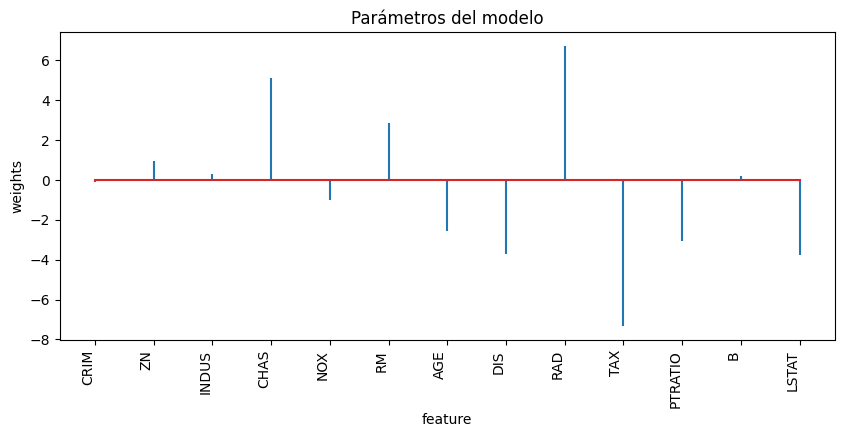

In [571]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': df_coeficientes.coef})

fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

### Validación Cruzada - K-Folds

In [572]:
# Train

regressor = SVR(kernel='linear', C=1)

# Entrenar el modelo
regressor.fit(X_train_scaled_op1, y_train_op1)

# Evaluar el modelo usando validación cruzada
scores_train_op1 = cross_val_score(regressor, X_train_scaled_op1, y_train_op1, cv=5)

print(f"Puntuaciones de validación cruzada (R2 score_op1): {scores_train_op1}")
print(f"Media de las puntuaciones_op1: {scores_train_op1.mean():.2f}")
print(f"Desvío Standart de las puntuaciones_op1: {scores_train_op1.std():.2f}")

Puntuaciones de validación cruzada (R2 score_op1): [0.53651863 0.35866045 0.73094841 0.54648424 0.58271769]
Media de las puntuaciones_op1: 0.55
Desvío Standart de las puntuaciones_op1: 0.12


Se entrena el modelo con una semilla para tener repetitividad en los resultados y poder comparar distintos modelos.

Al realizar la validación cruzada K-folds se observa que el R2 disminuye a 55%.
Al trabajar siempre con distintos conjuntos de entrenamiento y validación, la validación cruzada aporta una visión más amplia del comportamiento de la regresión lineal.


### Análisis de Residuos

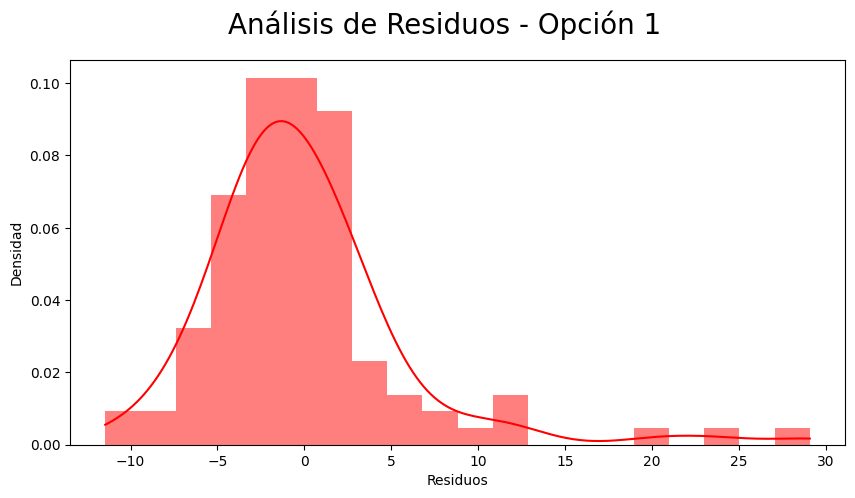

In [573]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test_op1 - y_pred_op1), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos - Opción 1', fontsize = 20)
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.show()

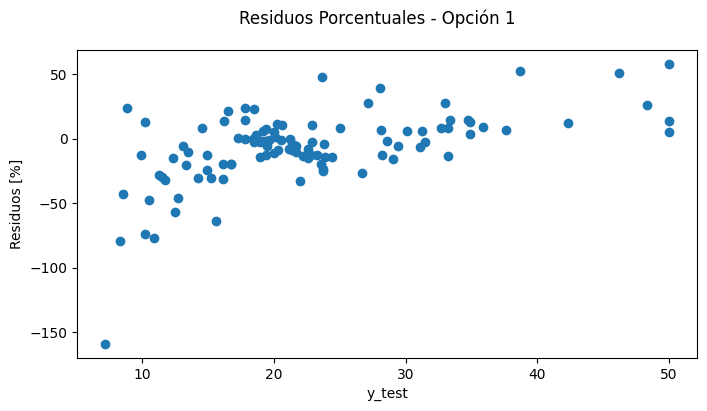

In [574]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Residuos Porcentuales - Opción 1')
plt.xlabel('y_test')
plt.ylabel('Residuos [%]')
plt.scatter(y_test_op1,100*(y_test_op1-y_pred_op1)/y_test_op1)
plt.show()

In [575]:
# Observar el primer valor
y_test_op1[0], y_pred_op1[0]

(23.7, 29.73211731457593)

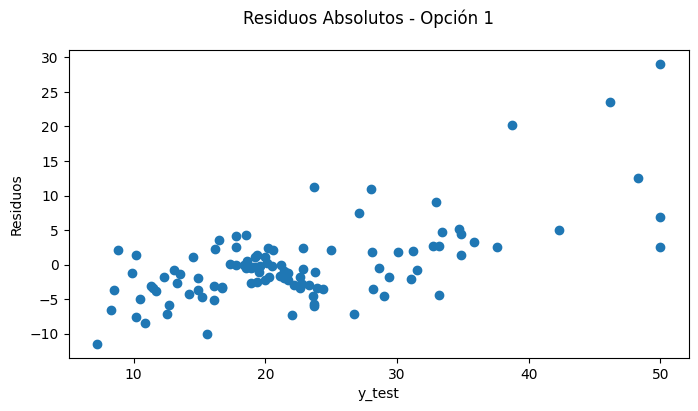

In [576]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Residuos Absolutos - Opción 1')
plt.xlabel('y_test')
plt.ylabel('Residuos')
plt.scatter(y_test_op1,y_test_op1-y_pred_op1)
plt.show()

Los residuos se centran el rango de +/- U$5000
El modelo tiende a subestimar los precios de las vivendas de mayor valor.

La distribución de residuos no es normal. Esto podría indicar que:
* El modelo no está capturando correctamente la relación entre las variables.
* Al modelo le faltan variables importantes.
* El modelo incluye variables irrelevantes.
* La relación entre las variables no es lineal.
* El modelo se ve afectado por los valores atípicos.

## **Gradiente Descendente**

### Funciones

In [577]:
# Gradiente descendente

def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100, ax=None):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = (m+1)x1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_val.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))

    # Inicializar pesos fijos
    W = np.ones((m + 1, 1))

    train_errors = []
    test_errors = []
    train_errors_rmse = []
    test_errors_rmse = []
    train_r2 = []
    test_r2 = []

    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        train_mse = np.mean(error_train ** 2)
        train_rmse = np.sqrt(train_mse)
        train_errors.append(train_mse)
        train_errors_rmse.append(train_rmse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W)
        error_test = y_val - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_rmse = np.sqrt(test_mse)
        test_errors.append(test_mse)
        test_errors_rmse.append(test_rmse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

        # Calcular R² para los conjuntos de entrenamiento y prueba
        train_r2.append(r2_score(y_train, np.matmul(X_train, W)))
        test_r2.append(r2_score(y_val, prediction_test))

    # Graficar errores de entrenamiento y prueba en el subplot dado por ax
    if ax is not None:
        ax.plot(train_errors, label='Error de entrenamiento')
        ax.plot(test_errors, label='Error de validación')
        ax.set_xlabel('Época')
        ax.set_ylabel('Error cuadrático medio')
        ax.legend()
        ax.set_title(f'lr={lr}, epochs={epochs}')
    else:
        # Graficar errores de entrenamiento y prueba
        plt.figure(figsize=(12, 6))
        plt.plot(train_errors, label='Error de entrenamiento')
        plt.plot(test_errors, label='Error de validación')
        plt.xlabel('Época')
        plt.ylabel('Error cuadrático medio')
        plt.legend()
        plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
        plt.show()

        print(f"MSE de entrenamiento final: {train_errors[-1]}")
        print(f"RMSE entrenamiento final: {train_errors_rmse[-1]}")
        print(f"R2 entrenamiento final: {train_r2[-1]}")

        print(f"\nMSE de prueba final: {test_errors[-1]}")
        print(f"RMSE de prueba final: {test_errors_rmse[-1]}")
        print(f"R2 de prueba final: {test_r2[-1]}")

    return W

In [578]:
# Gradiente Descendente Mini Batch

def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100, batch_size=11, ax=None):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

    # Inicializar pesos fijos
    W = np.ones((m + 1, 1))

    train_errors = []
    test_errors = []
    train_errors_rmse = []
    test_errors_rmse = []
    train_r2 = []
    test_r2 = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_rmse = np.sqrt(train_mse)
            train_errors.append(train_mse)
            train_errors_rmse.append(train_rmse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size
            W = W - (lr * gradient)

            prediction_test = np.matmul(X_val, W)
            error_test = y_val - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_rmse = np.sqrt(test_mse)
            test_errors.append(test_mse)
            test_errors_rmse.append(test_rmse)

        # Calcular R² para los conjuntos de entrenamiento y prueba
        train_r2.append(r2_score(y_train, np.matmul(X_train, W)))
        test_r2.append(r2_score(y_val, prediction_test))

    # Ahora graficamos en el subplot proporcionado por `ax`
    if ax is not None:
        ax.plot(train_errors, label='Error de entrenamiento')
        ax.plot(test_errors, label='Error de prueba')
        ax.set_xlabel('Iteración')
        ax.set_ylabel('Error cuadrático medio')
        ax.legend()
        ax.set_title(f'lr={lr}, epochs={epochs}, batch = {batch_size}')
    else:
        plt.figure(figsize=(12, 6))
        plt.plot(train_errors, label='Error de entrenamiento')
        plt.plot(test_errors, label='Error de prueba')
        plt.xlabel('Iteración')
        plt.ylabel('Error cuadrático medio')
        plt.legend()
        plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
        plt.show()

        print(f"MSE de entrenamiento final: {train_errors[-1]}")
        print(f"RMSE entrenamiento final: {train_errors_rmse[-1]}")
        print(f"R2 entrenamiento final: {train_r2[-1]}")

        print(f"\nMSE de prueba final: {test_errors[-1]}")
        print(f"RMSE de prueba final: {test_errors_rmse[-1]}")
        print(f"R2 de prueba final: {test_r2[-1]}")

    return W

### Entrenamiemto

In [579]:
X_train_gd, X_val_gd, y_train_gd, y_val_gd = train_test_split(X_train_scaled_op1, y_train_op1, test_size=0.125, random_state=42)
X_train_gd.shape, X_val_gd.shape, y_train_gd.shape, y_val_gd.shape


((369, 13), (53, 13), (369,), (53,))

In [580]:
X_train_gd=X_train_gd.reshape(-1,13)
y_train_gd= y_train_gd.values.reshape(-1, 1)
X_val_gd= X_val_gd.reshape(-1, 13)
y_val_gd= y_val_gd.values.reshape(-1, 1)

In [581]:
# Hiperparámetros

lr_mb = [0.01, 0.02, 0.05]
epochs = [20, 100, 200, 800]

#### Gradiente Descendente (Batch)

3


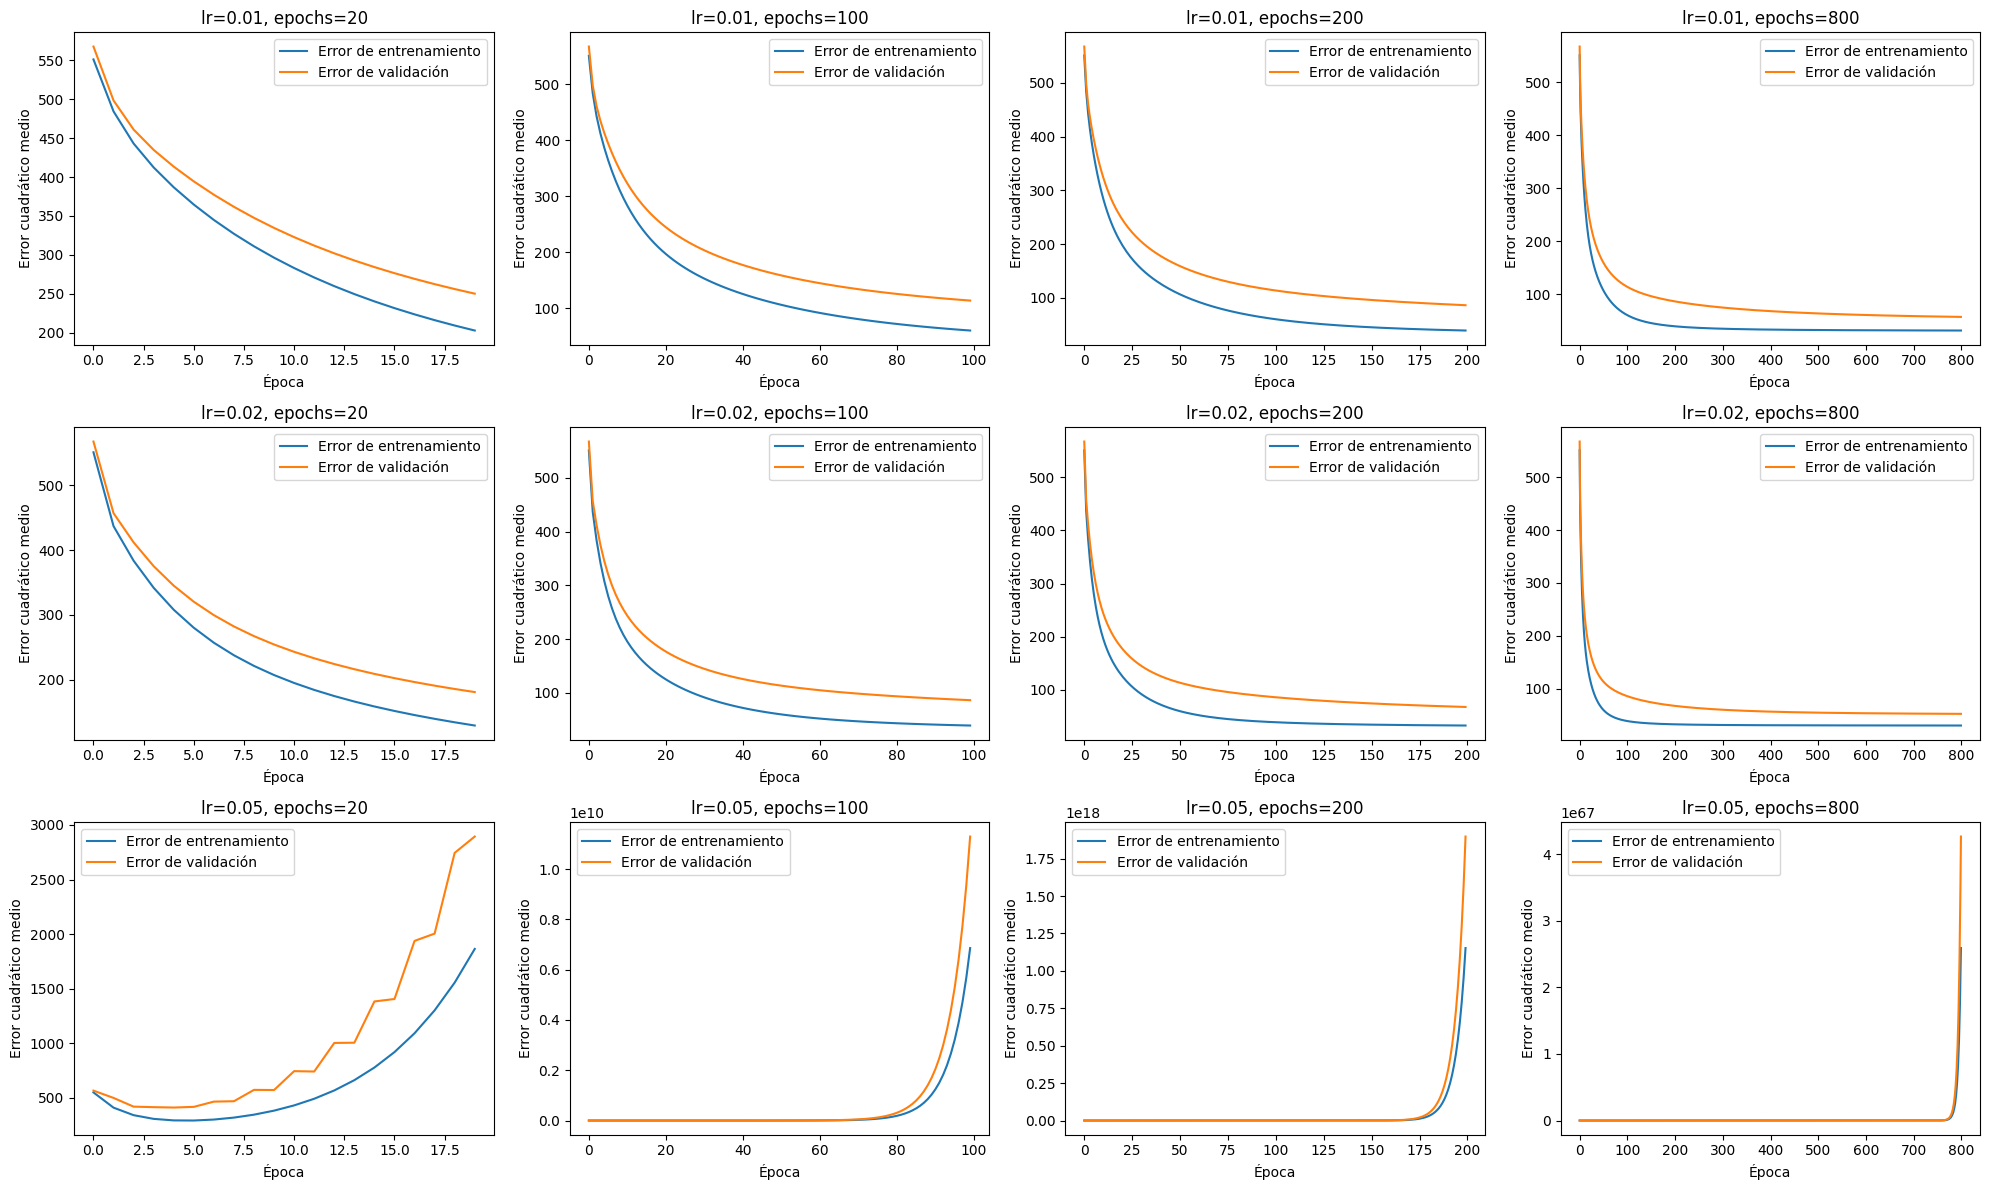

In [582]:
plt_totales = len(lr_mb) * len(epochs)
col = 4
fil = plt_totales // col + (plt_totales % col > 0)
print(fil)

fig, axes = plt.subplots(fil, col, figsize=(col * 5, fil * 4))
axes = axes.flatten()
idx = 0
for lr in lr_mb:
    for ep in epochs:
        if idx < plt_totales:
            ax = axes[idx]
            # Llamar a la función de mini batch gradient descent
            gradient_descent(X_train_gd, y_train_gd, X_val_gd, y_val_gd,
                                        lr=lr, epochs=ep, ax=ax)
            ax.set_title(f"lr={lr}, epochs={ep}")
            idx += 1

for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

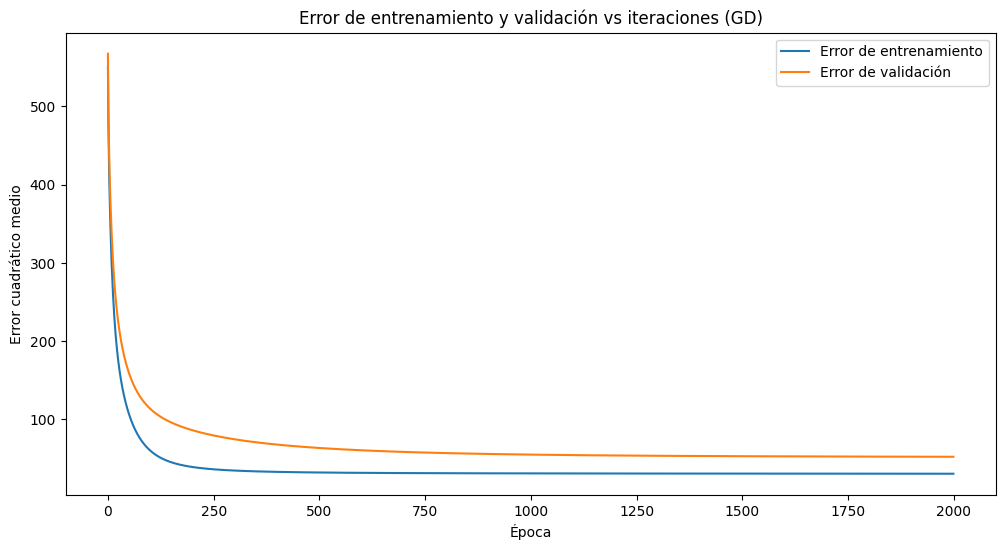

MSE de entrenamiento final: 30.568173070585306
RMSE entrenamiento final: 5.528849163305624
R2 entrenamiento final: 0.6496990727122415

MSE de prueba final: 52.22532401894833
RMSE de prueba final: 7.226709072527296
R2 de prueba final: 0.5000724486693215


array([[22.0173064 ],
       [-0.14211363],
       [ 0.49467571],
       [-0.29461904],
       [ 4.71315041],
       [-0.32680894],
       [ 3.35602737],
       [-2.83487211],
       [-2.95918121],
       [ 4.08523706],
       [-4.38591482],
       [-3.41223854],
       [ 0.18213202],
       [-3.27759741]])

In [583]:
gradient_descent(X_train_gd, y_train_gd, X_val_gd, y_val_gd, lr=0.01, epochs=2000)

#### Gradiente Descendente Mini Batch

In [584]:
batch_size= int(np.sqrt(len(X_train_gd)))

In [585]:
batch_size, X_train_gd.shape

(19, (369, 13))

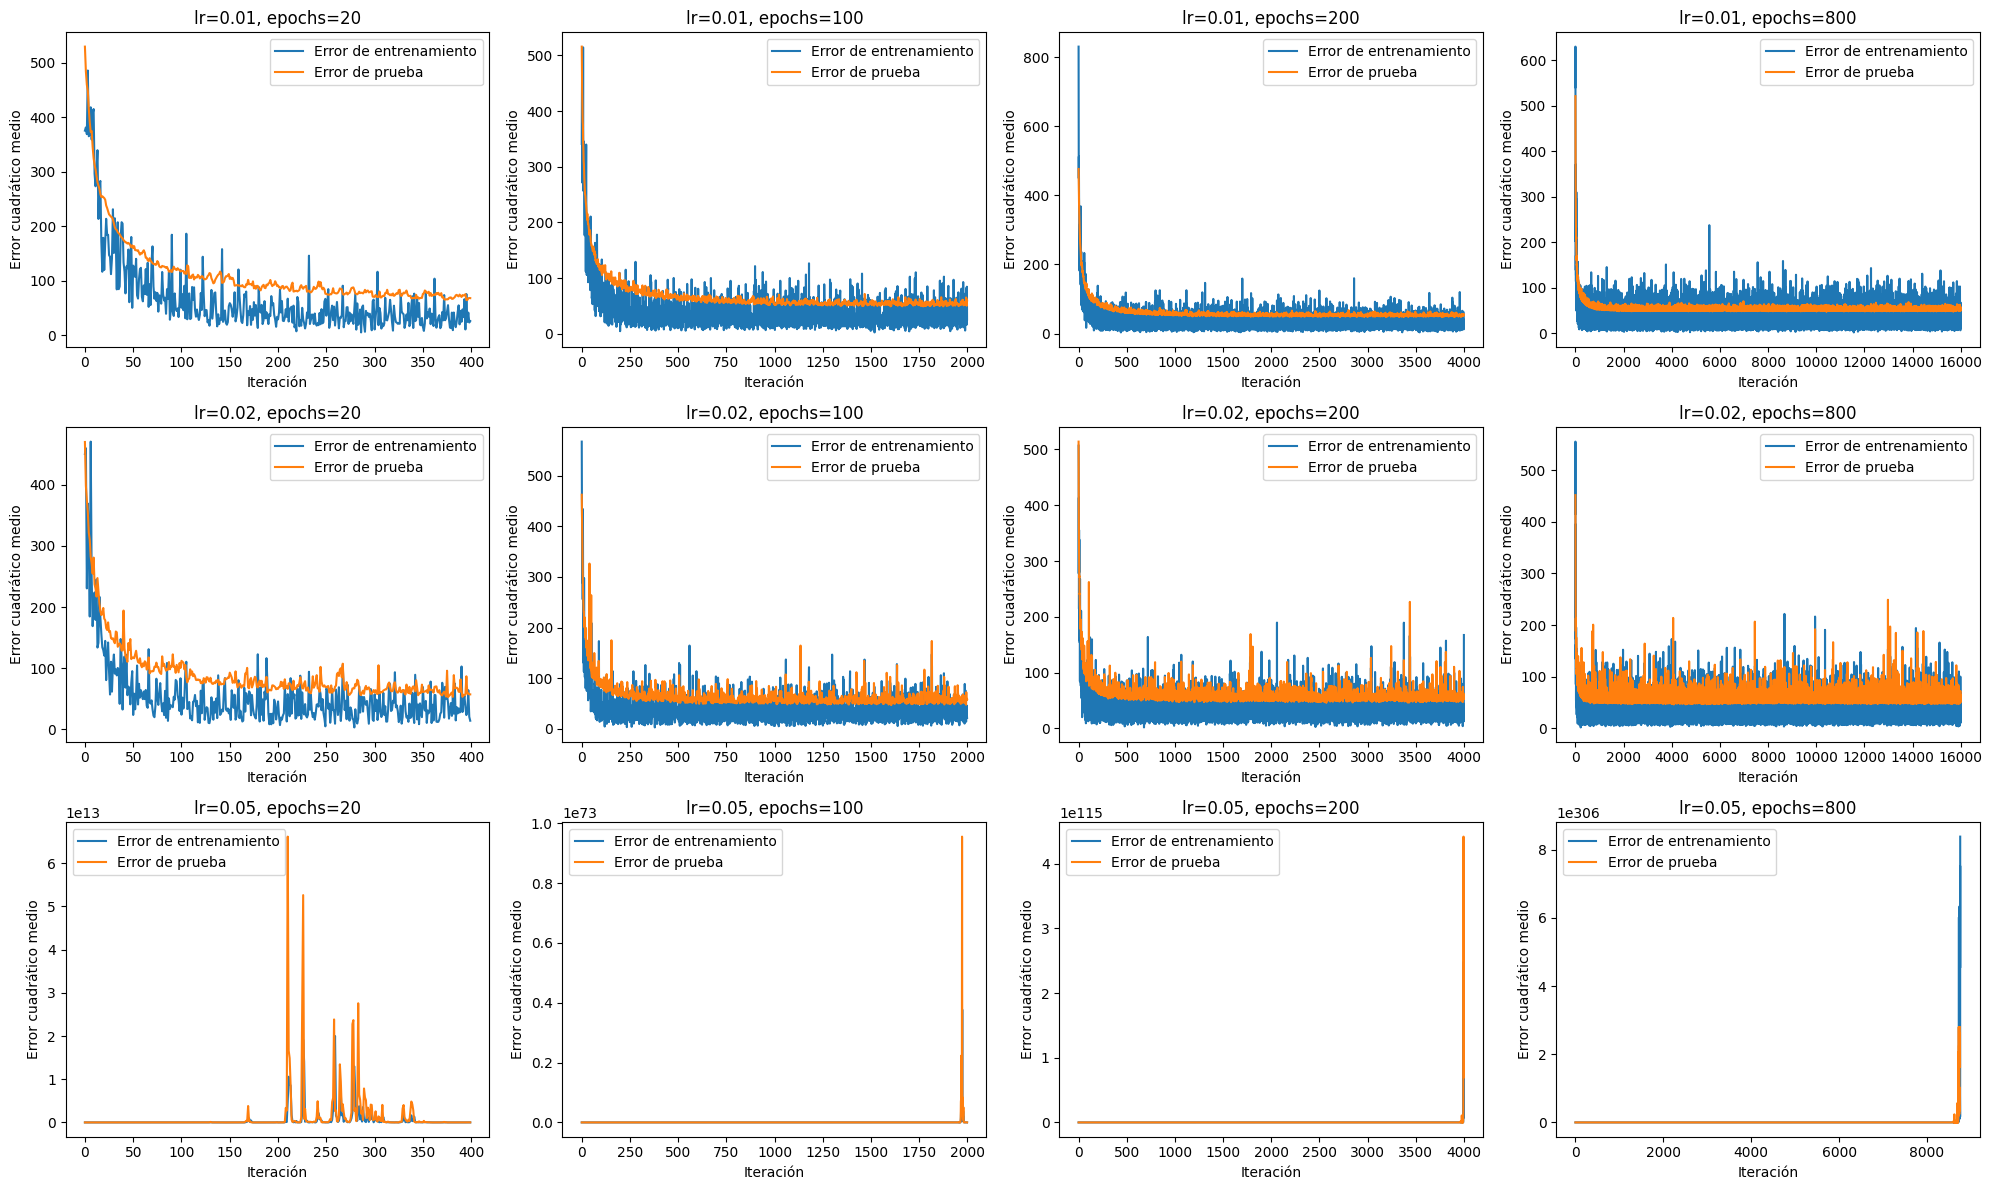

In [586]:
plt_totales = len(lr_mb) * len(epochs)
col = 4
fil = plt_totales // col + (plt_totales % col > 0)

fig, axes = plt.subplots(fil, col, figsize=(col * 5, fil * 4))
axes = axes.flatten()
idx = 0
for lr in lr_mb:
    for ep in epochs:
        if idx < plt_totales:
            ax = axes[idx]
            mini_batch_gradient_descent(X_train_gd, y_train_gd, X_val_gd, y_val_gd,
                                        lr=lr, epochs=ep, batch_size=batch_size, ax=ax)
            ax.set_title(f"lr={lr}, epochs={ep}")
            idx += 1

for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

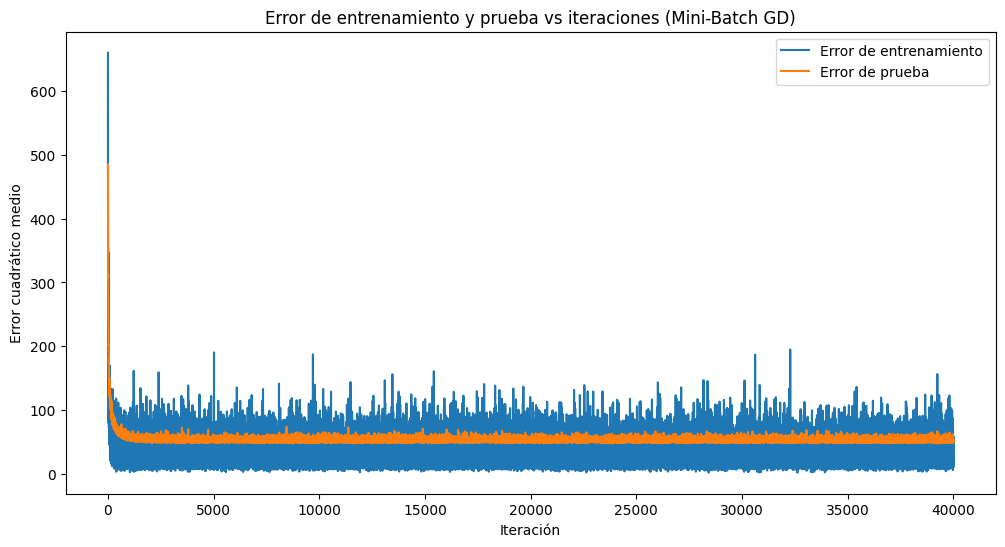

MSE de entrenamiento final: 31.63669005435019
RMSE entrenamiento final: 5.624650216177908
R2 entrenamiento final: 0.6516340331970607

MSE de prueba final: 52.86235907956454
RMSE de prueba final: 7.27065052657357
R2 de prueba final: 0.4939744227796189


array([[21.90229531],
       [-0.2674904 ],
       [ 0.5208633 ],
       [ 0.5840994 ],
       [ 4.49222587],
       [-0.62101065],
       [ 3.30317401],
       [-2.45738522],
       [-2.80519771],
       [ 6.41012771],
       [-7.52168637],
       [-3.48217547],
       [ 0.16414286],
       [-3.29993108]])

In [587]:
mini_batch_gradient_descent(X_train_gd, y_train_gd, X_val_gd, y_val_gd, lr=0.01, epochs=2000, batch_size=batch_size)

Se evalúa el comportamiento del Gradiente Descendente y del Gradiente Descendente Mini Batch.

El Gradiente Descendente Mini Batch es una solución intermedia entre el costo computacional (memoria al cargar todo el dataset) del Gradiente Descendente y el tiempo y ruido del Gradiente Descendente Estocástico.
Converge más rápido que el GD y con menos ruido que el SGD.

El mse es el mismo para los tres métodos al terminar el entrenamiento.

Cuando el número de iteraciones es bajo (con 20 y 100 epochs), no se aproxima al mínimo de la función de pérdida. En esta situación el modelo está subentrenado.

Para lograr la convergencia se aumenta el número de iteraciones (500 y 1000 epochs).

Finalmente se elige 2000 iteraciones ya que observamos que con 1000 epochs no se alcazaba la máxima convergencia.

Al variar el ratio de aprendizaje desde 0.01 a 0.05, se observa un aumento del ruido (0.02) hasta llegar a la divergencia (0.05).

Finalmente se elige un lr = 0.01.

## **Ridge**

In [588]:
modelo = make_pipeline(RobustScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-3, 6, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train_op1, y_train_op1)

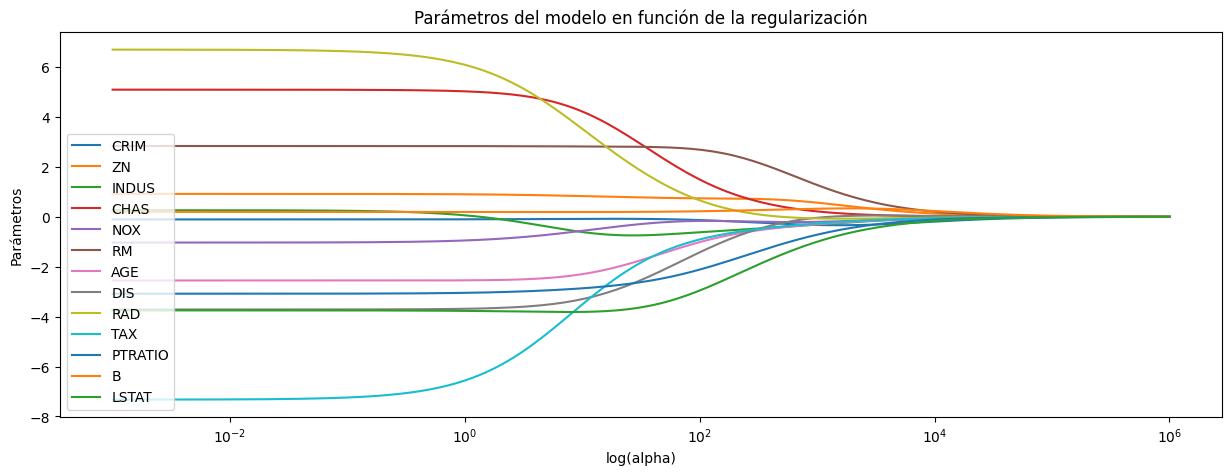

In [589]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(RobustScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train_op1, y_train_op1)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train_op1.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

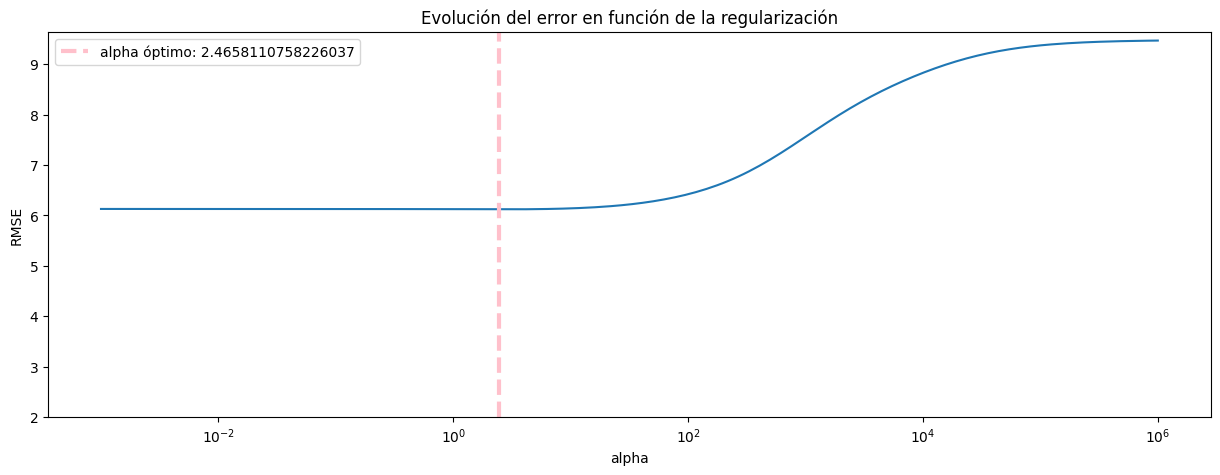

In [590]:
# Evolución del error de validación cruzada en función de alpha
# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]
mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)
min_mse_cv = np.min(mse_cv)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse = np.min(rmse_cv)
optimo = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])

plt.axvline(optimo,color='pink',label =f'alpha óptimo: {optimo}',ls='--', linewidth=3)
ax.legend()

ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [591]:
# Mejor valor alpha

print(f"Mínimo valor de rmse: {min_rmse}")
print(f"Mejor valor de alpha encontrado: {optimo}")

Mínimo valor de rmse: 6.120403532592219
Mejor valor de alpha encontrado: 2.4658110758226037


Text(0.5, 1.0, 'Parámetros del modelo')

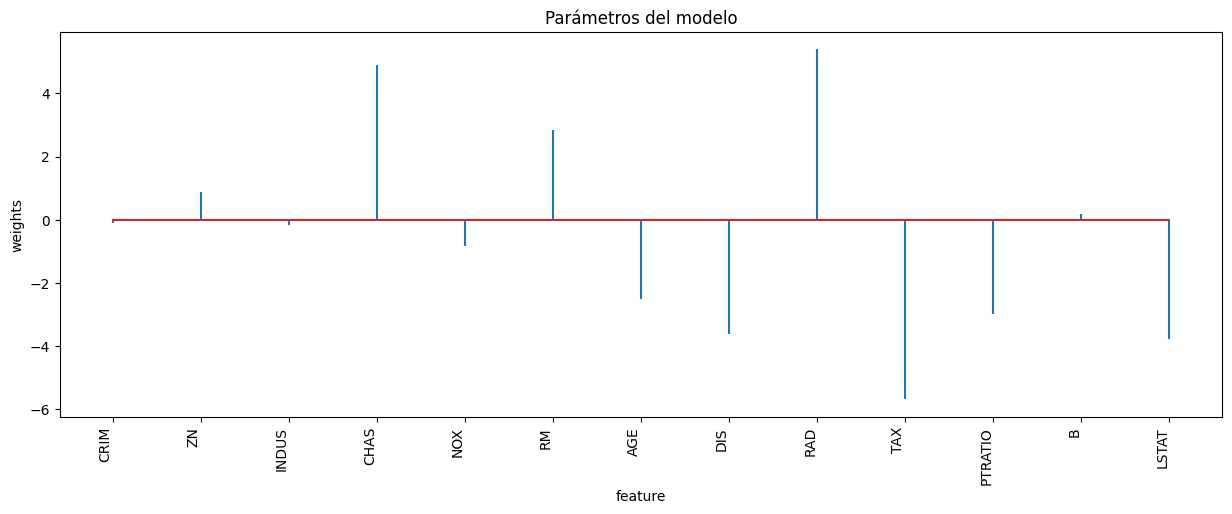

In [592]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train_op1.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [593]:
df_coeficientes

predictor      coef
0       CRIM -0.096936
1         ZN  0.882995
2      INDUS -0.157464
3       CHAS  4.903368
4        NOX -0.850329
5         RM  2.827461
6        AGE -2.521361
7        DIS -3.631227
8        RAD  5.395899
9        TAX -5.702401
10   PTRATIO -3.005531
11         B  0.192217
12     LSTAT -3.790607

In [594]:
df_variables_anuladas = df_coeficientes[df_coeficientes.coef == 0]
if len(df_variables_anuladas)==0:
    print('Ridge no anula ninguna variable explicativa')
else:
    print('Ridge anula estas variables explicativas:')
    for i,s in df_coeficientes[df_coeficientes.coef == 0].iterrows():
        variable_anulada = s['predictor']
        print(f'\t{variable_anulada}')

Ridge no anula ninguna variable explicativa


In [595]:
# Predicciones

y_pred_ridge = modelo.predict(X_test_op1)

In [596]:
# Testeo

mse_ridge = mean_squared_error(y_test_op1,
                y_pred_ridge,
                squared = True
             )
rmse_ridge = mean_squared_error(y_test_op1,
                y_pred_ridge,
                squared = False
             )
R2_ridge = metrics.r2_score(y_test_op1, y_pred_ridge)

print("\nMétricas en el conjunto de testeo:")
print(f'Error Cuadrático Medio (MSE_op1): {round(mse_ridge, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE_op1): {round(rmse_ridge, 3)}')
print(f'Coeficiente de Determinación (R^2_op1): {round(R2_ridge, 3)}')


Métricas en el conjunto de testeo:
Error Cuadrático Medio (MSE_op1): 33.873
Raíz Error Cuadrático Medio (RMSE_op1): 5.82
Coeficiente de Determinación (R^2_op1): 0.618


## **Lasso**

In [597]:
modelo = make_pipeline(RobustScaler(),
                        LassoCV(
                           alphas=np.logspace(-3, 6, 200),
                           cv=5
                        )
         )

_ = modelo.fit(X_train_op1, y_train_op1)

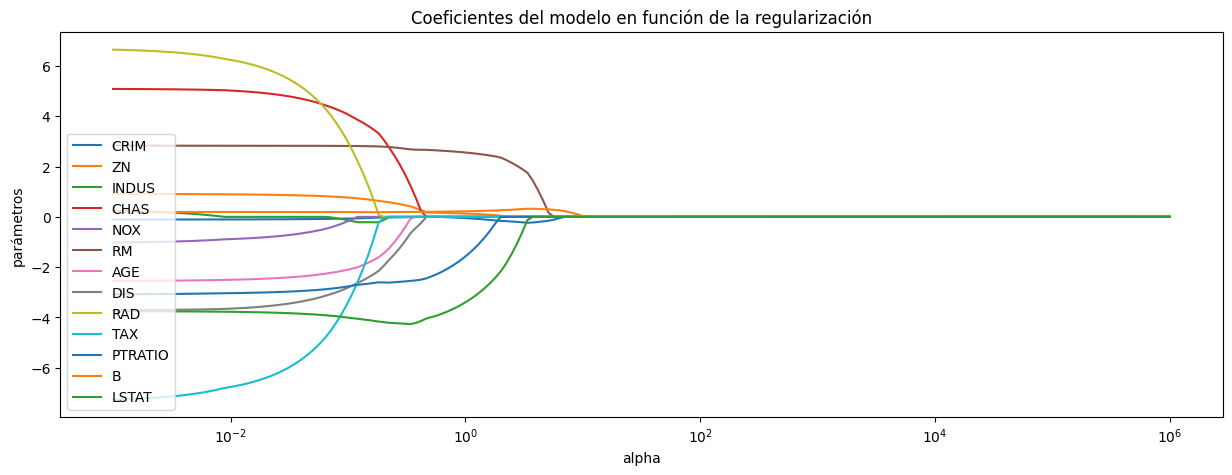

In [598]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(RobustScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train_op1, y_train_op1)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
# ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

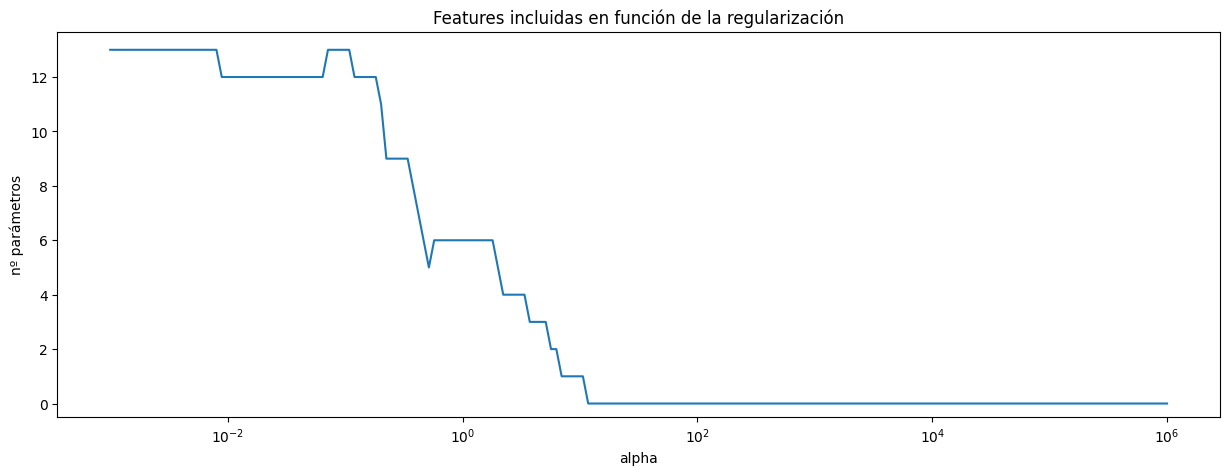

In [599]:
# Número de features incluidas (parámetros !=0) en función de alpha

alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    # modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux = make_pipeline(RobustScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train_op1, y_train_op1)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

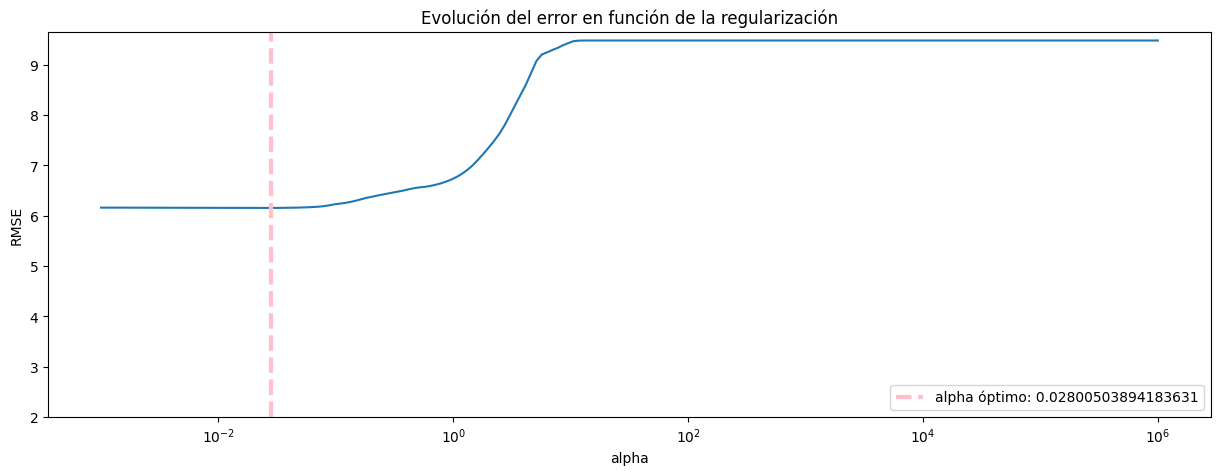

In [600]:
# Evolución del error de validación cruzada en función de alpha
# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
plt.axvline(optimo,color='pink',label =f'alpha óptimo: {optimo}',ls='--', linewidth=3)
ax.legend()
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [601]:
# Mejor valor alpha

print(f"Mínimo valor de rmse: {min_rmse}")
print(f"Mejor valor de alpha encontrado: {optimo}")

Mínimo valor de rmse: 6.154900319105198
Mejor valor de alpha encontrado: 0.02800503894183631


Text(0.5, 1.0, 'Parámetros del modelo')

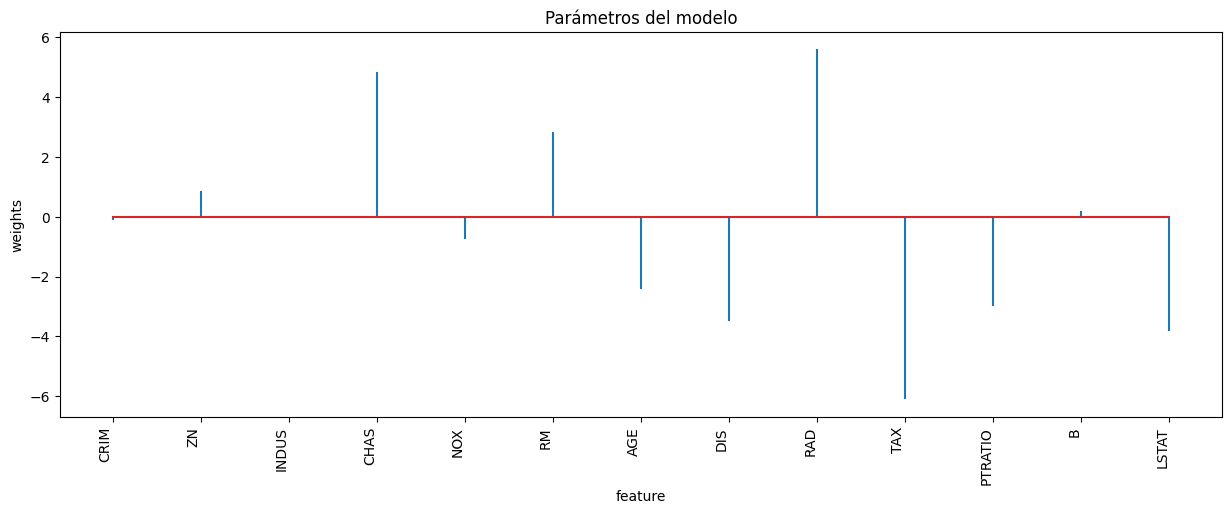

In [602]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train_op1.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [603]:
df_coeficientes

predictor      coef
0       CRIM -0.095904
1         ZN  0.870327
2      INDUS -0.000000
3       CHAS  4.829064
4        NOX -0.749199
5         RM  2.824400
6        AGE -2.421649
7        DIS -3.480422
8        RAD  5.598402
9        TAX -6.110641
10   PTRATIO -2.982218
11         B  0.194063
12     LSTAT -3.819528

In [604]:
df_variables_anuladas = df_coeficientes[df_coeficientes.coef == 0]
if len(df_variables_anuladas)==0:
    print('Lasso no anula ninguna variable explicativa')
else:
    print('Lasso anula estas variables explicativas:')
    for i,s in df_coeficientes[df_coeficientes.coef == 0].iterrows():
        variable_anulada = s['predictor']
        print(f'\t{variable_anulada}')

Lasso anula estas variables explicativas:
	INDUS


In [605]:
# Predicciones

y_pred_lasso = modelo.predict(X_test_op1)

In [606]:
# Testeo

mse_lasso = mean_squared_error(y_test_op1,
                y_pred_lasso,
                squared = True
             )
rmse_lasso = mean_squared_error(y_test_op1,
                y_pred_lasso,
                squared = False
             )
R2_lasso = metrics.r2_score(y_test_op1, y_pred_lasso)

print("\nMétricas en el conjunto de testeo:")
print(f'Error Cuadrático Medio (MSE_op1): {round(mse_lasso, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE_op1): {round(rmse_lasso, 3)}')
print(f'Coeficiente de Determinación (R^2_op1): {round(R2_lasso, 3)}')


Métricas en el conjunto de testeo:
Error Cuadrático Medio (MSE_op1): 33.842
Raíz Error Cuadrático Medio (RMSE_op1): 5.817
Coeficiente de Determinación (R^2_op1): 0.619


## **ElasticNet**

In [607]:
modelo = make_pipeline(RobustScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-3, 6, 200),
                              cv              = 5
                           )
         )

_ = modelo.fit(X_train_op1, y_train_op1)

mod = modelo.steps[1][1]

In [608]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio

mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

l1_ratio    mod.alphas_     mse_cv   rmse_cv
177       0.0       0.009885  37.754426  6.144463
178       0.0       0.008907  37.755501  6.144551
176       0.0       0.010970  37.755638  6.144562
375       0.1       0.012174  37.756455  6.144628
376       0.1       0.010970  37.756971  6.144670
..        ...            ...        ...       ...
603       0.7  731680.714343  89.883659  9.480699
602       0.7  811984.499318  89.883659  9.480699
601       0.7  901101.825167  89.883659  9.480699
608       0.7  434701.315813  89.883659  9.480699
699       0.7      33.312948  89.883659  9.480699

[1400 rows x 4 columns]

Text(0, 0.5, 'rmse_cv')

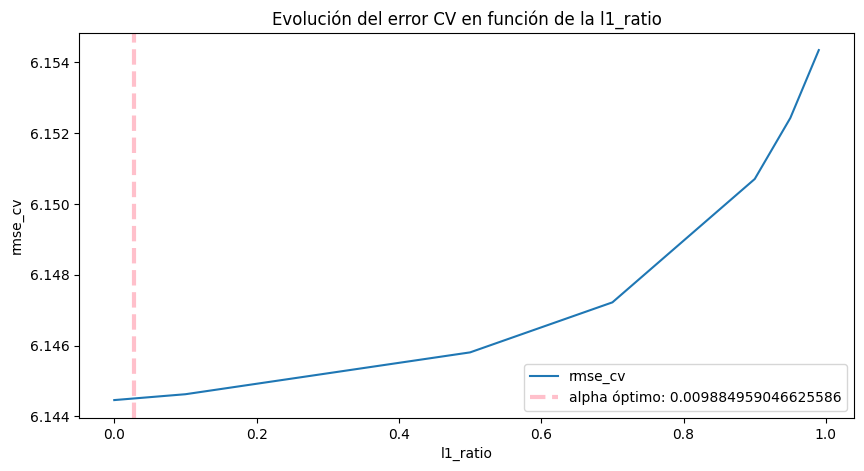

In [609]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
plt.axvline(optimo,color='pink',label =f'alpha óptimo: {mod.alpha_}',ls='--', linewidth=3)
ax.legend()
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv')

In [610]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod.l1_ratio_}")

Mejor valor de alpha encontrado: 0.009884959046625586
Mejor valor de l1_ratio encontrado: 0.0


Text(0.5, 1.0, 'Parámetros del modelo')

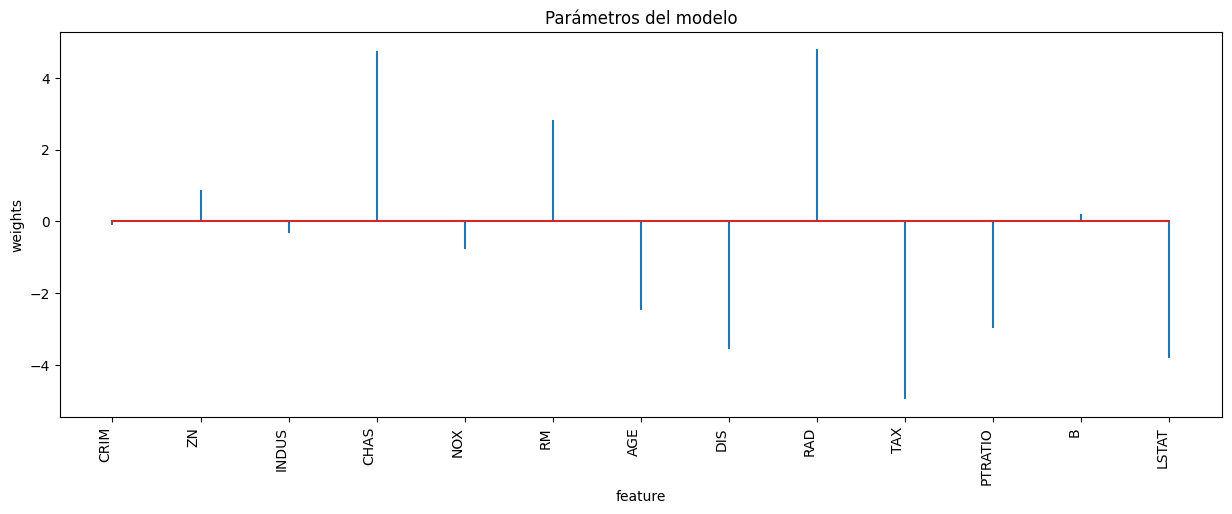

In [611]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train_op1.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [612]:
df_coeficientes

predictor      coef
0       CRIM -0.092342
1         ZN  0.866237
2      INDUS -0.329574
3       CHAS  4.746508
4        NOX -0.760240
5         RM  2.823963
6        AGE -2.478771
7        DIS -3.558974
8        RAD  4.788825
9        TAX -4.968367
10   PTRATIO -2.965904
11         B  0.190966
12     LSTAT -3.805461

In [613]:
df_variables_anuladas = df_coeficientes[df_coeficientes.coef == 0]
if len(df_variables_anuladas)==0:
    print('Elastic-net no anula ninguna variable explicativa')
else:
    print('Elastic-net anula estas variables explicativas:')
    for i,s in df_coeficientes[df_coeficientes.coef == 0].iterrows():
        variable_anulada = s['predictor']
        print(f'\t{variable_anulada}')

Elastic-net no anula ninguna variable explicativa


In [614]:
# Predicciones

y_pred_elastic = modelo.predict(X_test_op1)

In [615]:
# Testeo

mse_elastic = mean_squared_error(y_test_op1,
                y_pred_elastic,
                squared = True
             )
rmse_elastic = mean_squared_error(y_test_op1,
                y_pred_elastic,
                squared = False
             )
R2_elastic = metrics.r2_score(y_test_op1, y_pred_elastic)

print("\nMétricas en el conjunto de testeo:")
print(f'Error Cuadrático Medio (MSE_op1): {round(mse_elastic, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE_op1): {round(rmse_elastic, 3)}')
print(f'Coeficiente de Determinación (R^2_op1): {round(R2_elastic, 3)}')


Métricas en el conjunto de testeo:
Error Cuadrático Medio (MSE_op1): 33.615
Raíz Error Cuadrático Medio (RMSE_op1): 5.798
Coeficiente de Determinación (R^2_op1): 0.621


## **Comparación de modelos de regresión**

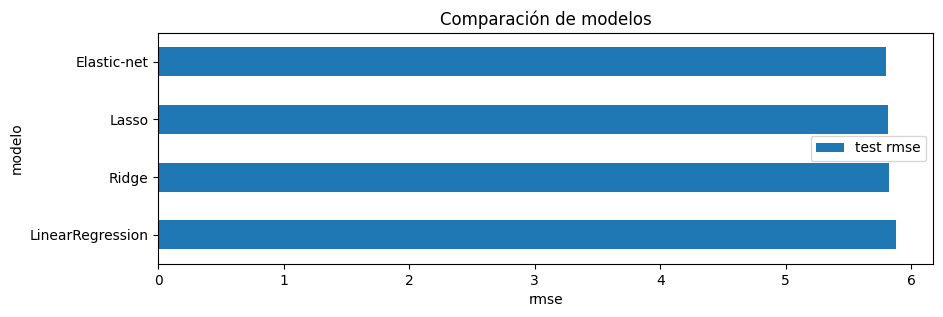

In [616]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_op1, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [617]:
# Validación cruzada train

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Validación cruzada para Ridge
scores_ridge = cross_val_score(ridge, X_train_scaled_op1, y_train_op1, cv=5)
print("Ridge - Puntuaciones de validación cruzada (R2 score):", scores_ridge)
print(f"Media del R2 score (Ridge): {scores_ridge.mean():.2f}")
print(f"Desvío Estándar del R2 score (Ridge): {scores_ridge.std():.2f}")

# Validación cruzada para Lasso
scores_lasso = cross_val_score(lasso, X_train_scaled_op1, y_train_op1, cv=5)
print("\nLasso - Puntuaciones de validación cruzada (R2 score):", scores_lasso)
print(f"Media del R2 score (Lasso): {scores_lasso.mean():.2f}")
print(f"Desvío Estándar del R2 score (Lasso): {scores_lasso.std():.2f}")

# Validación cruzada para Elastic Net
scores_elastic_net = cross_val_score(elastic_net, X_train_scaled_op1, y_train_op1, cv=5)
print("\nElastic Net - Puntuaciones de validación cruzada (R2 score):", scores_elastic_net)
print(f"Media del R2 score (Elastic Net): {scores_elastic_net.mean():.2f}")
print(f"Desvío Estándar del R2 score (Elastic Net): {scores_elastic_net.std():.2f}")

Ridge - Puntuaciones de validación cruzada (R2 score): [0.5443731  0.40893112 0.74008378 0.4946518  0.64092084]
Media del R2 score (Ridge): 0.57
Desvío Estándar del R2 score (Ridge): 0.12

Lasso - Puntuaciones de validación cruzada (R2 score): [0.50534919 0.3612773  0.74076611 0.53619533 0.63252167]
Media del R2 score (Lasso): 0.56
Desvío Estándar del R2 score (Lasso): 0.13

Elastic Net - Puntuaciones de validación cruzada (R2 score): [0.49826777 0.38274578 0.73791129 0.55263874 0.61478298]
Media del R2 score (Elastic Net): 0.56
Desvío Estándar del R2 score (Elastic Net): 0.12


In [618]:
df_comparacion = pd.DataFrame({
    'LinearReggresion':[rmse_op1,r2_op1],
    'Ridge':[rmse_ridge,R2_ridge],
    'Lasso':[rmse_lasso,R2_lasso],
    'Elastic-net':[rmse_elastic,R2_elastic],
},index=['rmse','R^2'])
df_comparacion

LinearReggresion     Ridge     Lasso  Elastic-net
rmse          5.881329  5.820058  5.817406     5.797867
R^2           0.610144  0.618225  0.618572     0.621130

In [619]:
mejor_modelo_rmse = df_comparacion.loc['rmse'].sort_values().index[0]
mejor_modelo_r2 = df_comparacion.loc['R^2'].sort_values(ascending=False).index[0]
if (mejor_modelo_rmse==mejor_modelo_r2):
  print(f'Siguiendo las métricas rmse y R^2, el modelo más robusto es aportado por {mejor_modelo_rmse}')
else:
  print(f'Siguiendo la métrica de rmse, el modelo más robusto es aportado por {mejor_modelo_rmse}.\nEn cambio, siguiendo la métrica de R^2, el modelo más robusto es aportado por {mejor_modelo_r2}')

Siguiendo las métricas rmse y R^2, el modelo más robusto es aportado por Elastic-net


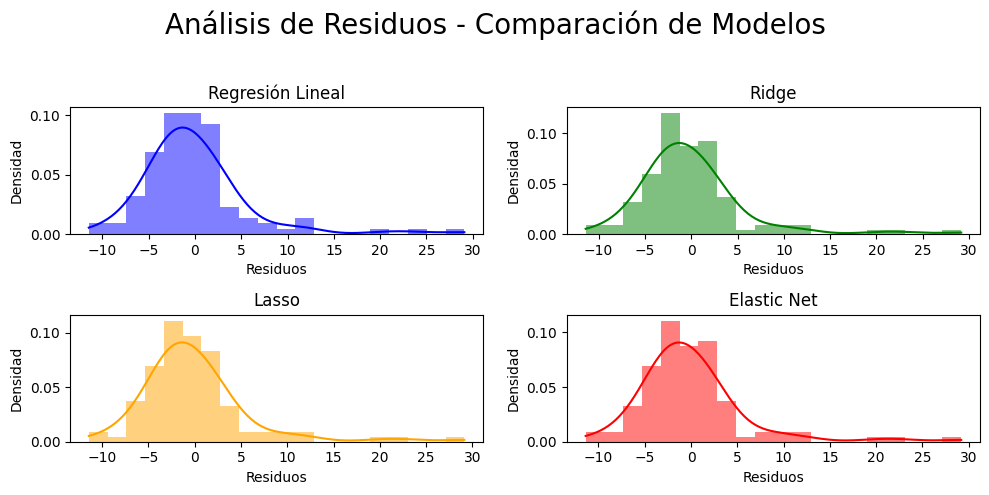

In [620]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Análisis de Residuos - Comparación de Modelos', fontsize=20)

# Subplot para regresión lineal
sns.histplot((y_test_op1 - y_pred_op1), color="blue", kde=True, stat="density", linewidth=0, bins=20, ax=axs[0, 0])
axs[0, 0].set_title("Regresión Lineal")
axs[0, 0].set_xlabel('Residuos')
axs[0, 0].set_ylabel('Densidad')

# Subplot para Ridge
sns.histplot((y_test_op1 - y_pred_ridge), color="green", kde=True, stat="density", linewidth=0, bins=20, ax=axs[0, 1])
axs[0, 1].set_title("Ridge")
axs[0, 1].set_xlabel('Residuos')
axs[0, 1].set_ylabel('Densidad')

# Subplot para Lasso
sns.histplot((y_test_op1 - y_pred_lasso), color="orange", kde=True, stat="density", linewidth=0, bins=20, ax=axs[1, 0])
axs[1, 0].set_title("Lasso")
axs[1, 0].set_xlabel('Residuos')
axs[1, 0].set_ylabel('Densidad')

# Subplot para Elastic Net
sns.histplot((y_test_op1 - y_pred_elastic), color="red", kde=True, stat="density", linewidth=0, bins=20, ax=axs[1, 1])
axs[1, 1].set_title("Elastic Net")
axs[1, 1].set_xlabel('Residuos')
axs[1, 1].set_ylabel('Densidad')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

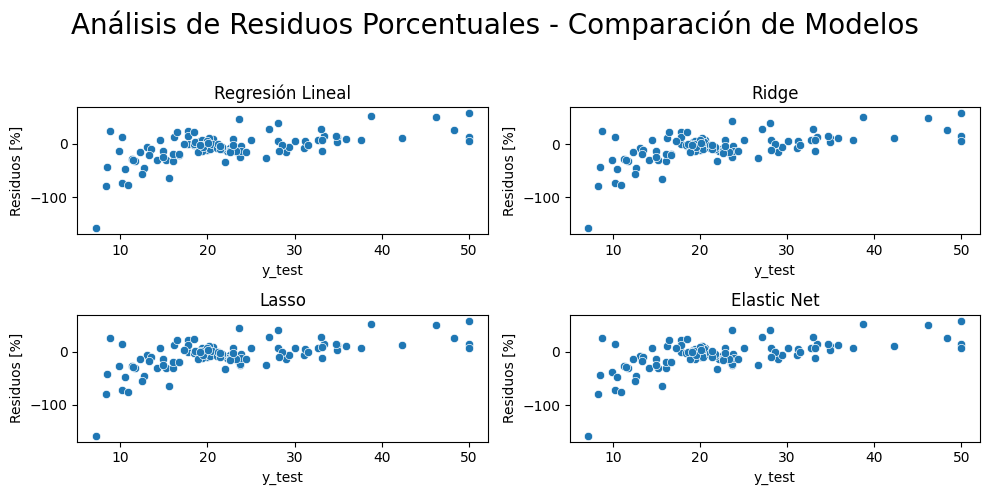

In [621]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Análisis de Residuos Porcentuales - Comparación de Modelos', fontsize=20)

# Subplot para regresión lineal
sns.scatterplot(x=y_test_op1, y=100*(y_test_op1-y_pred_op1)/y_test_op1, ax=axs[0, 0])
axs[0, 0].set_title("Regresión Lineal")
axs[0, 0].set_xlabel('y_test')
axs[0, 0].set_ylabel('Residuos [%]')

# Subplot para Ridge
sns.scatterplot(x=y_test_op1, y=100*(y_test_op1-y_pred_ridge)/y_test_op1, ax=axs[0, 1])
axs[0, 1].set_title("Ridge")
axs[0, 1].set_xlabel('y_test')
axs[0, 1].set_ylabel('Residuos [%]')

# Subplot para Lasso
sns.scatterplot(x=y_test_op1, y=100*(y_test_op1-y_pred_lasso)/y_test_op1, ax=axs[1, 0])
axs[1, 0].set_title("Lasso")
axs[1, 0].set_xlabel('y_test')
axs[1, 0].set_ylabel('Residuos [%]')

# Subplot para Elastic Net
sns.scatterplot(x=y_test_op1, y=100*(y_test_op1-y_pred_elastic)/y_test_op1, ax=axs[1, 1])
axs[1, 1].set_title("Elastic Net")
axs[1, 1].set_xlabel('y_test')
axs[1, 1].set_ylabel('Residuos [%]')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

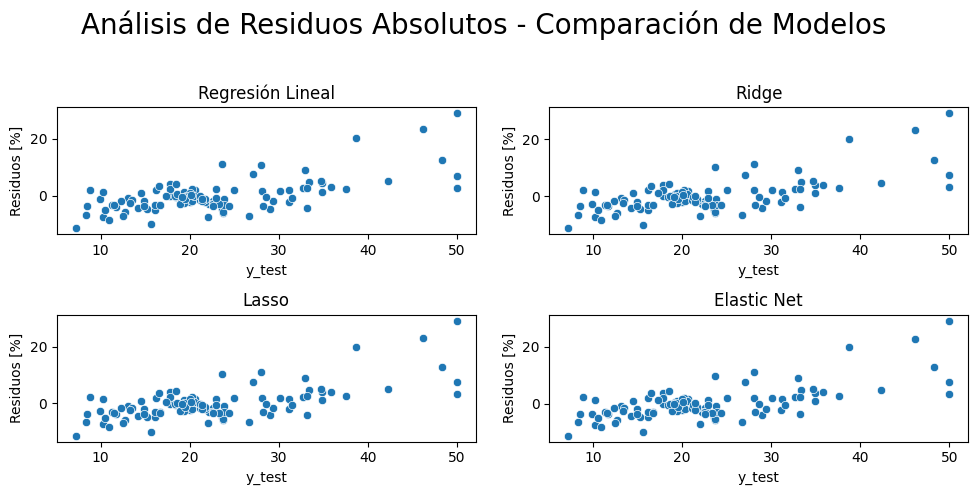

In [622]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Análisis de Residuos Absolutos - Comparación de Modelos', fontsize=20)

# Subplot para regresión lineal
sns.scatterplot(x=y_test_op1, y=(y_test_op1-y_pred_op1), ax=axs[0, 0])
axs[0, 0].set_title("Regresión Lineal")
axs[0, 0].set_xlabel('y_test')
axs[0, 0].set_ylabel('Residuos [%]')

# Subplot para Ridge
sns.scatterplot(x=y_test_op1, y=(y_test_op1-y_pred_ridge), ax=axs[0, 1])
axs[0, 1].set_title("Ridge")
axs[0, 1].set_xlabel('y_test')
axs[0, 1].set_ylabel('Residuos [%]')

# Subplot para Lasso
sns.scatterplot(x=y_test_op1, y=(y_test_op1-y_pred_lasso), ax=axs[1, 0])
axs[1, 0].set_title("Lasso")
axs[1, 0].set_xlabel('y_test')
axs[1, 0].set_ylabel('Residuos [%]')

# Subplot para Elastic Net
sns.scatterplot(x=y_test_op1, y=(y_test_op1-y_pred_elastic), ax=axs[1, 1])
axs[1, 1].set_title("Elastic Net")
axs[1, 1].set_xlabel('y_test')
axs[1, 1].set_ylabel('Residuos [%]')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **Conclusiones**

* Lasso elimina la variable explicativa INDUS del modelo.
* Observando las métricas de todos los modelos con los datos de testeo, el modelo más robusto se obtiene con Elastic-net.

* Siguiendo las métricas rmse y R^2, el modelo más robusto es aportado por Elastic-net.

* No se realiza la comparación con los resultados obtenidos con los métodos de Gradiente Descendente porque la perfomance de este modelo nunca va a ser superior a la obtenida con la Regresión Lineal clásica.

# **Opción 2**
* Los valores faltantes se imputan:
  * CHAS a la moda por ser una variable categórica.
  * RM a la media por tener una distribución casi normal.
  * CRIM, ZN, NOX, DIS, B y LSTAT a la mediana por tener distribuciones sesgadas.
  * INDUS, AGE, RAD, TAX Y PTRATIO mediante KNN por tener distribuciones bimodales.
* Los outliers se imputan con KNN
* Escalado Standart: se opta por este escalado, que tiene menor costo computacional, porque se da tratamiento a los valores atípicos.

In [623]:
X_train_op2 = X_train.copy()
y_train_op2 = y_train.copy()
X_test_op2 = X_test.copy()
y_test_op2 = y_test.copy()

### Imputación de valores faltantes

In [624]:
# Los faltantes de la variable categórica CHAS se imputan a la moda en el conjunto train
idx_chas_null = X_train_op2[X_train_op2['CHAS'].isna()].index
X_train_op2.loc[idx_chas_null,'CHAS']=X_train_op2['CHAS'].mode()[0]

# Los faltantes de la variable categórica CHAS se imputan a la moda en el conjunto test
idx_chas_null = X_test_op2[X_test_op2['CHAS'].isna()].index
X_test_op2.loc[idx_chas_null,'CHAS']=X_test_op2['CHAS'].mode()[0]

In [625]:
# Se imputa la media a RM por tener una distribución aproximadamente normal y a las restantes la mediana
# a excepción de INDUS, AGE, RAD, TAX Y PTRATIO que son bimodales y se impatarán por KNN
CRIM_median = X_train_op2['CRIM'].median()
ZN_median = X_train_op2['ZN'].median()
NOX_median = X_train_op2['NOX'].median()
RM_mean = X_train_op2['RM'].mean()
DIS_median = X_train_op2['DIS'].median()
B_median = X_train_op2['B'].median()
LSTAT_median = X_train_op2['LSTAT'].median()

X_train_op2['CRIM'] = X_train_op2['CRIM'].fillna(CRIM_median)
X_train_op2['ZN'] = X_train_op2['ZN'].fillna(ZN_median)
X_train_op2['NOX'] = X_train_op2['NOX'].fillna(NOX_median)
X_train_op2['RM'] = X_train_op2['RM'].fillna(RM_mean)
X_train_op2['DIS'] = X_train_op2['DIS'].fillna(DIS_median)
X_train_op2['B'] = X_train_op2['B'].fillna(B_median)
X_train_op2['LSTAT'] = X_train_op2['LSTAT'].fillna(LSTAT_median)

X_test_op2['CRIM'] = X_test_op2['CRIM'].fillna(CRIM_median)
X_test_op2['ZN'] = X_test_op2['ZN'].fillna(ZN_median)
X_test_op2['NOX'] = X_test_op2['NOX'].fillna(NOX_median)
X_test_op2['RM'] = X_test_op2['RM'].fillna(RM_mean)
X_test_op2['DIS'] = X_test_op2['DIS'].fillna(DIS_median)
X_test_op2['B'] = X_test_op2['B'].fillna(B_median)
X_test_op2['LSTAT'] = X_test_op2['LSTAT'].fillna(LSTAT_median)

In [626]:
# Verificación
print(f"\nNulos en X_train_op2: {X_train_op2.isnull().sum()}")
print(f"\nNulos en X_test_op2: {X_test_op2.isnull().sum()}")


Nulos en X_train_op2: CRIM       0
ZN         0
INDUS      1
CHAS       0
NOX        0
RM         0
AGE        5
DIS        0
RAD        7
TAX        5
PTRATIO    5
B          0
LSTAT      0
dtype: int64

Nulos en X_test_op2: CRIM       0
ZN         0
INDUS      1
CHAS       0
NOX        0
RM         0
AGE        2
DIS        0
RAD        2
TAX        1
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [627]:
#Los faltantes de INDUS, RAD y TAX se imputan por KNN (K-Vecinos más cercanos)
knn_imputer = KNNImputer()
X_train_op2 = pd.DataFrame(knn_imputer.fit_transform(X_train_op2), columns=X_train_op2.columns)

X_test_op2 = pd.DataFrame(knn_imputer.transform(X_test_op2), columns=X_test_op2.columns)

In [628]:
# Los valores atípicos se setean a nulos en conjunto train
for col in X_train_op2.columns:
  if col == 'CHAS':
    continue
  limite_inferior = X_train_op2[col].quantile(0.03)
  limite_superior = X_train_op2[col].quantile(0.97)
  idx_atipico = X_train_op2[col][(X_train_op2[col] > limite_superior) | (X_train_op2[col] < limite_inferior)].index
  X_train_op2[col].loc[idx_atipico]=None

X_train_op2.isnull().sum()

CRIM       26
ZN         11
INDUS      23
CHAS        0
NOX        25
RM         26
AGE        13
DIS        26
RAD         0
TAX        18
PTRATIO     8
B          13
LSTAT      25
dtype: int64

In [629]:
# Los valores atípicos se imputan por KNN conjunto train
knn_imputer = KNNImputer()
X_train_op2 = pd.DataFrame(knn_imputer.fit_transform(X_train_op2), columns=X_train_op2.columns)

In [630]:
# Verificación
print(f"\nNulos en X_train_op2: {X_train_op2.isnull().sum()}")
print(f"\nNulos en X_test_op2: {X_test_op2.isnull().sum()}")


Nulos en X_train_op2: CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Nulos en X_test_op2: CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


## Escalado

In [631]:
scaler=StandardScaler()

X_train_scaled_op2 = scaler.fit_transform(X_train_op2)
X_test_scaled_op2 = scaler.transform(X_test_op2)

print("Antes del escalado:")
print(X_train_op2.head(5))
print("Después del escalado:")
print(X_train_scaled_op2[:5, :])

Antes del escalado:
       CRIM         ZN      INDUS  CHAS    NOX      RM        AGE       DIS  \
0  0.060892   6.528591   8.937346   1.0  0.538  6.7672  51.224094  5.243777   
1  0.036150  80.000000   4.950000   0.0  0.411  6.6300  23.400000  5.116700   
2  0.101530   0.000000  12.830000   0.0  0.437  6.2790  74.500000  4.052200   
3  0.590050   0.000000  21.890000   0.0  0.624  6.3720  97.900000  2.327400   
4  0.289550   0.000000  10.590000   0.0  0.489  5.4120  60.524452  3.587500   

         RAD         TAX    PTRATIO       B      LSTAT  
0  20.416908  197.236588  19.639059  391.60   7.033962  
1   4.000000  245.000000  19.200000  396.90   4.700000  
2   5.000000  398.000000  18.700000  373.66  11.970000  
3   4.000000  437.000000  21.200000  385.76  11.120000  
4   4.000000  277.000000  18.600000  348.93  29.550000  
Después del escalado:
[[-0.53979132 -0.20860859 -0.30252102  3.37813036 -0.11297879  0.82705737
  -0.66228981  0.75791331  1.26699919 -1.31894759  0.56763971  0.41

## **Regresión Lineal**

In [632]:
model_lr_op2 = LinearRegression()
model_lr_op2.fit(X_train_scaled_op2, y_train_op2)

# Predicciones sobre el conjunto de entrenamiento
y_pred_train_op2 = model_lr_op2.predict(X_train_scaled_op2)
# Métricas
mse_train_op2 = mean_squared_error(y_train_op2, y_pred_train_op2, squared=True)
rmse_train_op2 = math.sqrt(mse_train_op2) # mean_squared_error(y_train_op2,y_pred_train_op2, squared=False)
r2_train_op2 = r2_score(y_train_op2, y_pred_train_op2)

# Predicciones sobre el conjunto de test
y_pred_op2 = model_lr_op2.predict(X_test_scaled_op2)
# Métricas
mse_op2 = mean_squared_error(y_test_op2, y_pred_op2, squared=True)
rmse_op2 = math.sqrt(mse_op2) # mean_squared_error(y_test_op2, y_pred_op2, squared=False)
r2_op2 = r2_score(y_test_op2, y_pred_op2)

print("Métricas en el conjunto de entrenamiento:")
print(f'Error Cuadrático Medio (MSE): {round(mse_train_op2, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE): {round(rmse_train_op2, 3)}')
print(f'Coeficiente de Determinación (R^2): {round(r2_train_op2, 3)}')

print("\nMétricas en el conjunto de testeo:")
print(f'Error Cuadrático Medio (MSE): {round(mse_op2, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE): {round(rmse_op2, 3)}')
print(f'Coeficiente de Determinación (R^2): {round(r2_op2, 3)}')

# model_lr_op2.score(X_train_scaled,y_train), model_lr.score(X_test_scaled,y_test)

Métricas en el conjunto de entrenamiento:
Error Cuadrático Medio (MSE): 31.5
Raíz Error Cuadrático Medio (RMSE): 5.612
Coeficiente de Determinación (R^2): 0.648

Métricas en el conjunto de testeo:
Error Cuadrático Medio (MSE): 57.155
Raíz Error Cuadrático Medio (RMSE): 7.56
Coeficiente de Determinación (R^2): 0.356


In [633]:
# Coeficientes de la recta de regresión
intercepto = model_lr_op2.intercept_
print(f"Intercepto: {intercepto}")
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_op2.columns,
                         'coef': model_lr_op2.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

Intercepto: 22.884508388740645


predictor      coef
0       CRIM -1.045406
1         ZN  0.493027
2      INDUS  0.187800
3       CHAS  1.083740
4        NOX -0.573717
5         RM  3.223387
6        AGE -0.691976
7        DIS -2.454081
8        RAD  3.396549
9        TAX -3.071451
10   PTRATIO -2.077267
11         B  0.859902
12     LSTAT -3.268411

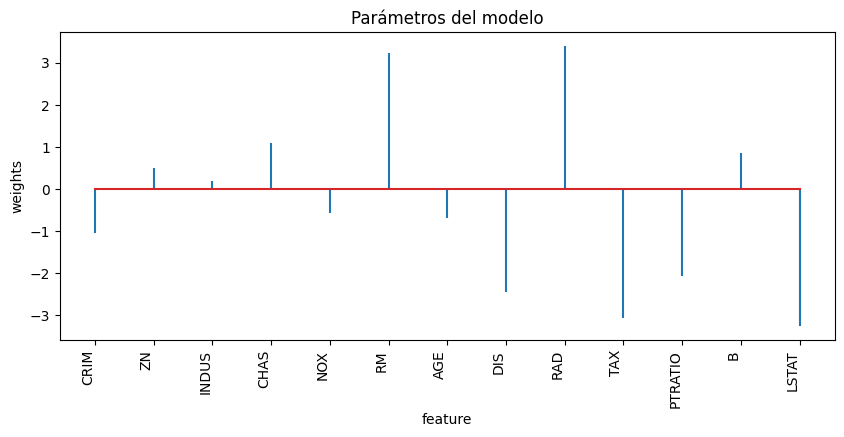

In [634]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': df_coeficientes.coef})

fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

### Validación Cruzada - K-Folds

In [635]:
regressor = SVR(kernel='linear', C=1)

# Entrenar el modelo
regressor.fit(X_train_scaled_op2, y_train_op2)

# Evaluar el modelo usando validación cruzada
scores_train_op2 = cross_val_score(regressor, X_train_scaled_op2, y_train_op2, cv=5)

print(f"Puntuaciones de validación cruzada (R2 score_op2): {scores_train_op2}")
print(f"Media de las puntuaciones_op2: {scores_train_op2.mean():.2f}")
print(f"Desvío Standart de las puntuaciones_op2: {scores_train_op2.std():.2f}")

Puntuaciones de validación cruzada (R2 score_op2): [0.43057454 0.37025429 0.70496004 0.71314644 0.64458277]
Media de las puntuaciones_op2: 0.57
Desvío Standart de las puntuaciones_op2: 0.14


### Análisis de Residuos

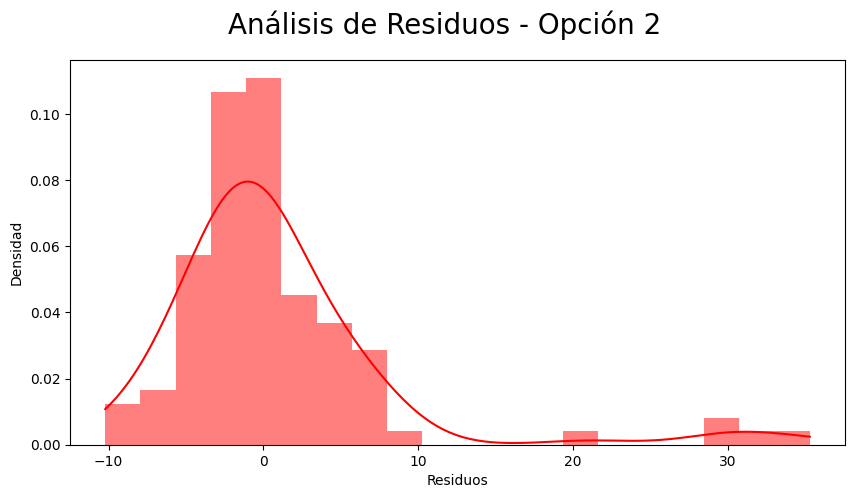

In [636]:
fig = plt.figure(figsize=(10,5))
sns.histplot((y_test_op2 - y_pred_op2), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos - Opción 2', fontsize = 20)
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.show()

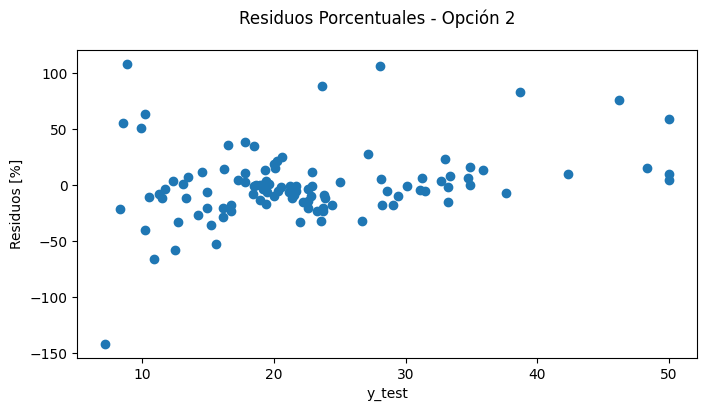

In [637]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Residuos Porcentuales - Opción 2')
plt.xlabel('y_test')
plt.ylabel('Residuos [%]')
plt.scatter(y_test_op2,100*(y_test_op2-y_pred_op2)/y_test_op2)
plt.show()

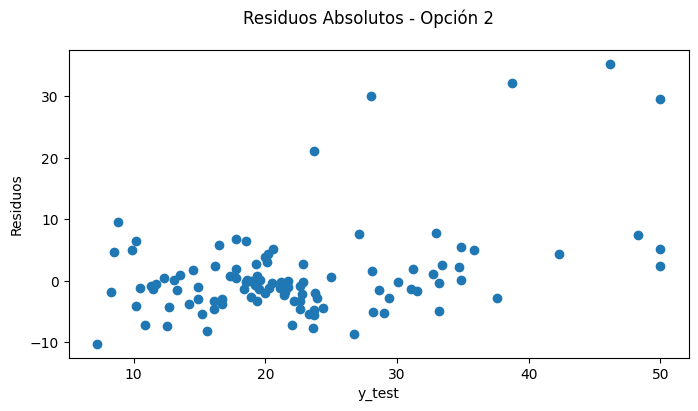

In [638]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Residuos Absolutos - Opción 2')
plt.xlabel('y_test')
plt.ylabel('Residuos')
plt.scatter(y_test_op2,y_test_op2-y_pred_op2)
plt.show()

## **Gradiente Descendente**

In [639]:
X_train_gd, X_val_gd, y_train_gd, y_val_gd = train_test_split(X_train_scaled_op2, y_train_op2, test_size=0.125, random_state=42)
X_train_gd.shape, X_val_gd.shape, y_train_gd.shape, y_val_gd.shape


((369, 13), (53, 13), (369,), (53,))

In [640]:
X_train_gd=X_train_gd.reshape(-1,13)
y_train_gd= y_train_gd.values.reshape(-1, 1)
X_val_gd= X_val_gd.reshape(-1, 13)
y_val_gd= y_val_gd.values.reshape(-1, 1)

In [641]:
# Hiperparámetros

lr_mb = [0.01, 0.02, 0.1]
epochs = [20, 100, 200, 800]

#### Gradiente Descendente (Batch)

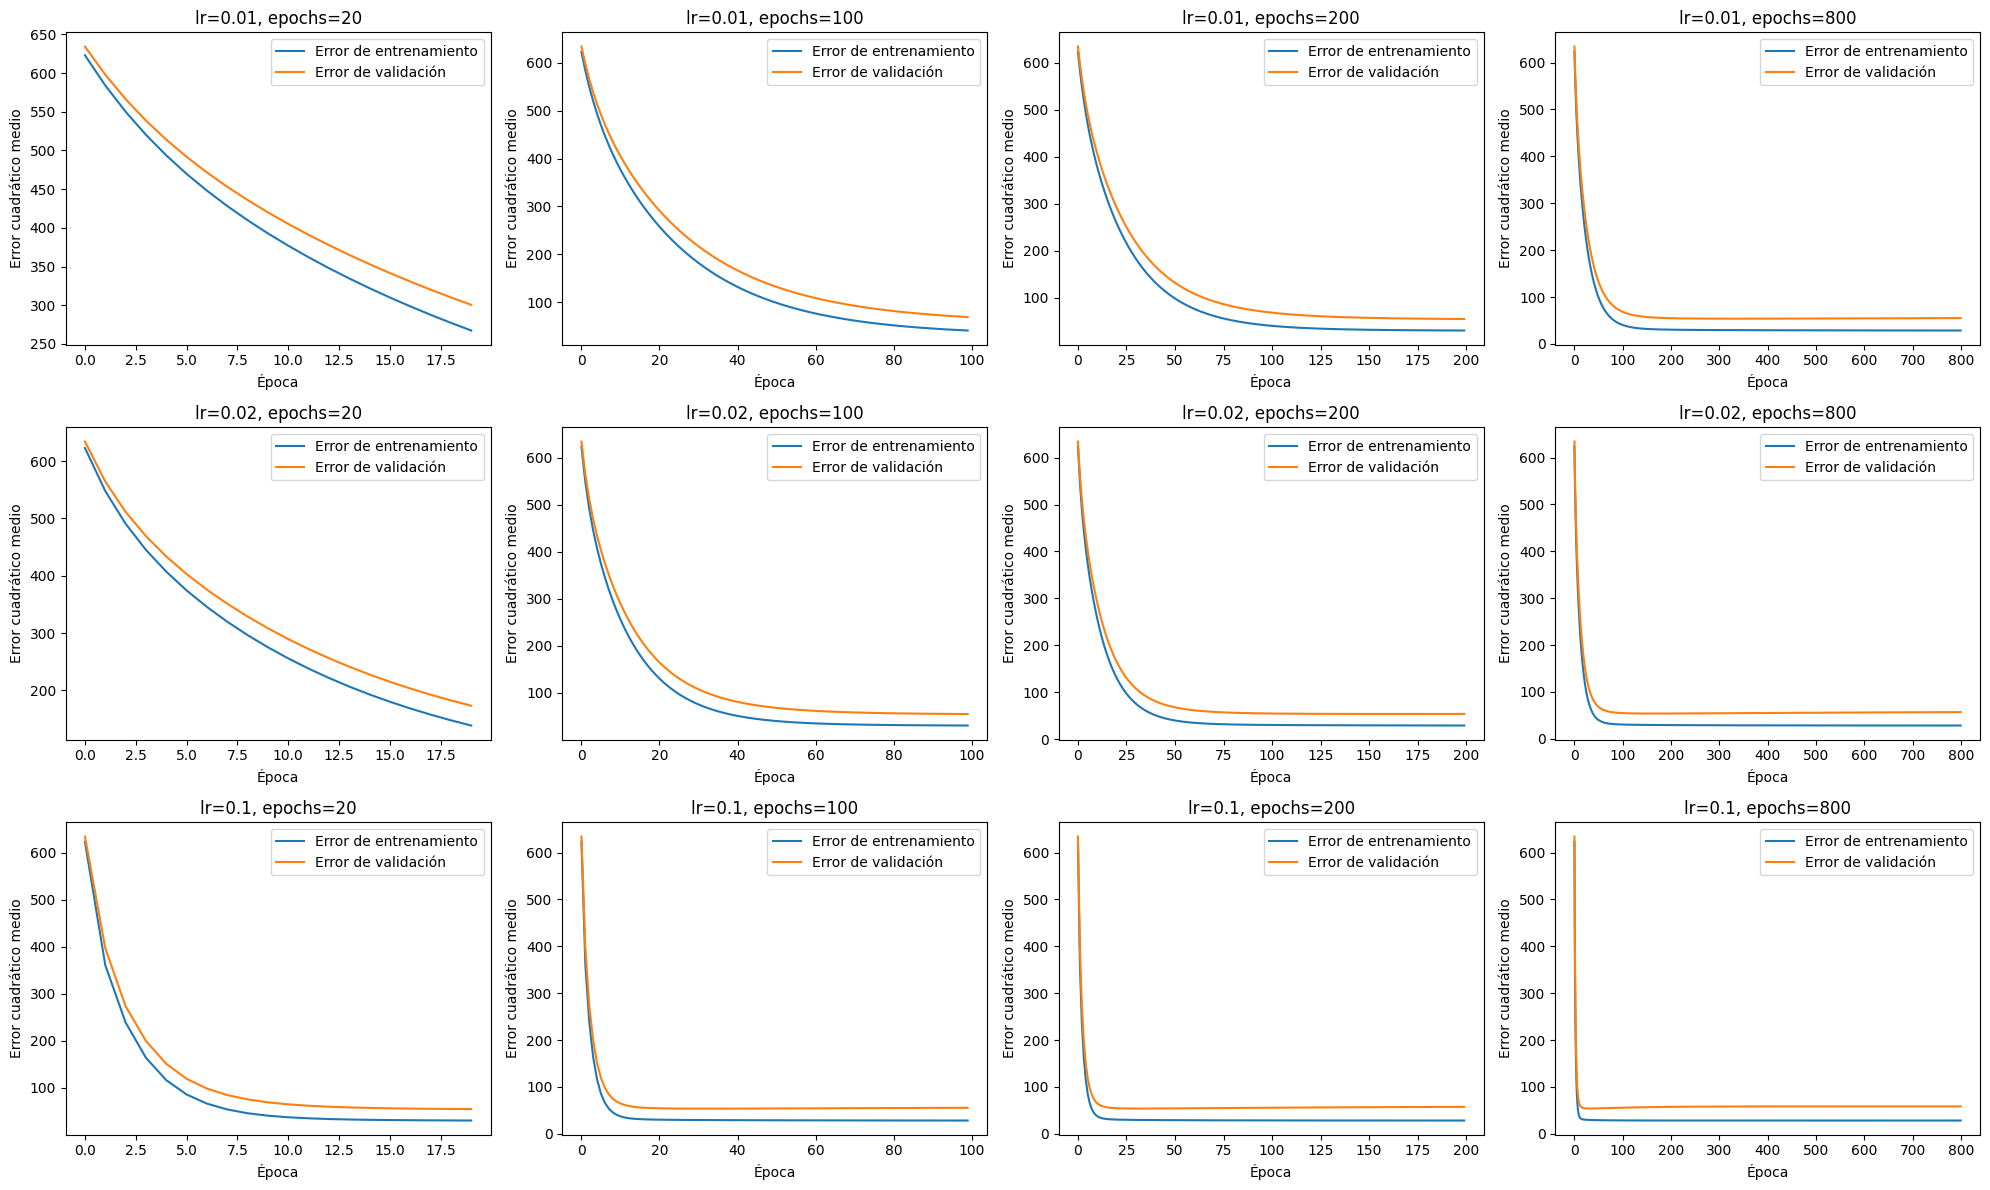

In [642]:
plt_totales = len(lr_mb) * len(epochs)
col = 4
fil = plt_totales // col + (plt_totales % col > 0)

fig, axes = plt.subplots(fil, col, figsize=(col * 5, fil * 4))
axes = axes.flatten()
idx = 0
for lr in lr_mb:
    for ep in epochs:
        if idx < plt_totales:
            ax = axes[idx]
            # Llamar a la función de mini batch gradient descent
            gradient_descent(X_train_gd, y_train_gd, X_val_gd, y_val_gd,
                                        lr=lr, epochs=ep, ax=ax)
            ax.set_title(f"lr={lr}, epochs={ep}")
            idx += 1

for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

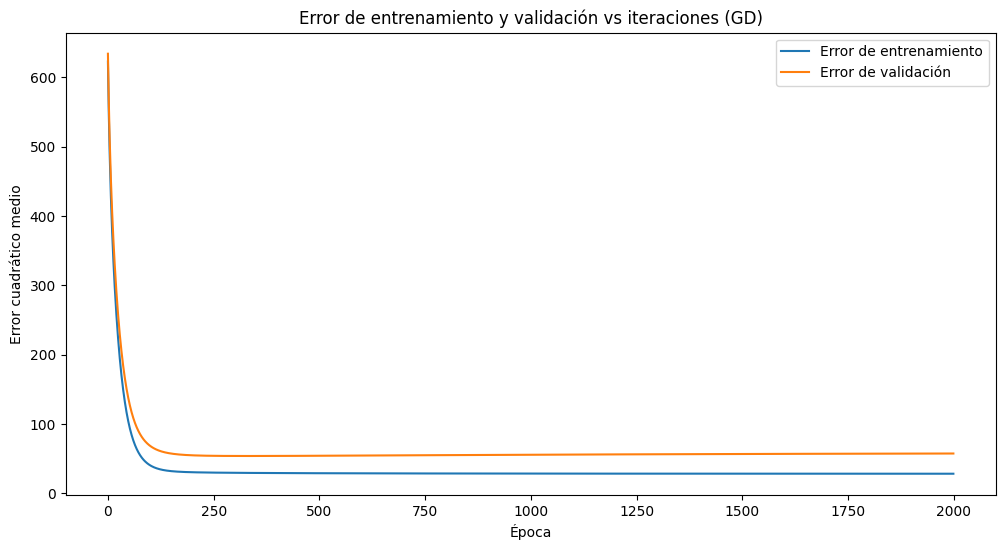

MSE de entrenamiento final: 28.24957568983742
RMSE entrenamiento final: 5.315032990474982
R2 entrenamiento final: 0.6762676740428015

MSE de prueba final: 57.41297008555733
RMSE de prueba final: 7.57713468836059
R2 de prueba final: 0.45041364340639745


array([[22.7835746 ],
       [-1.28949909],
       [ 0.39938592],
       [ 0.4470456 ],
       [ 1.06374876],
       [-0.42450145],
       [ 3.57739224],
       [-0.96426781],
       [-2.62370764],
       [ 3.85357575],
       [-3.9196002 ],
       [-2.34125953],
       [ 0.83754921],
       [-2.72496572]])

In [643]:
gradient_descent(X_train_gd, y_train_gd, X_val_gd, y_val_gd, lr=0.01, epochs=2000)

#### Gradiente Descendente Mini Batch

In [644]:
batch_size= int(np.sqrt(len(X_train_gd)))

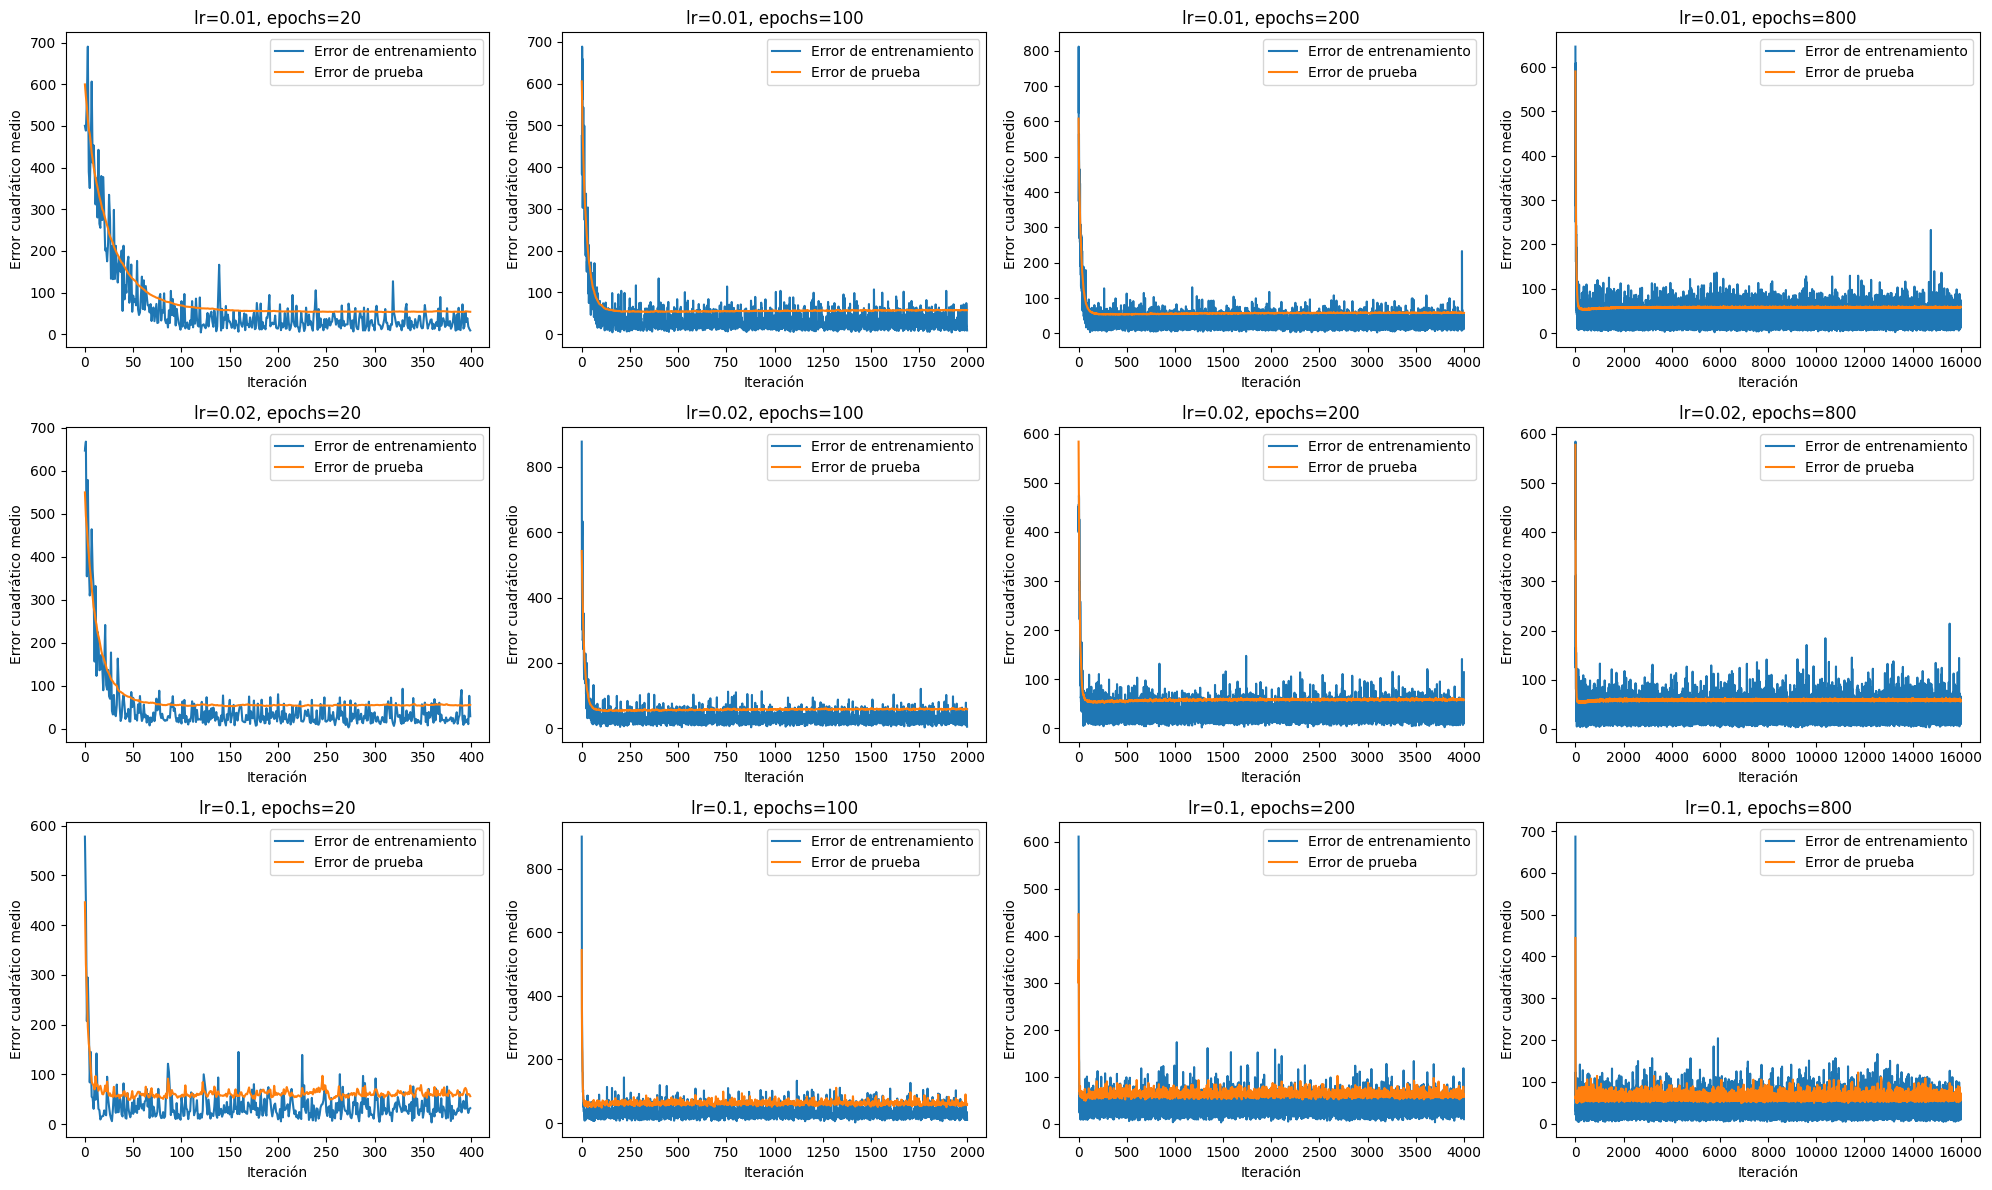

In [645]:
plt_totales = len(lr_mb) * len(epochs)
col = 4
fil = plt_totales // col + (plt_totales % col > 0)

fig, axes = plt.subplots(fil, col, figsize=(col * 5, fil * 4))
axes = axes.flatten()
idx = 0
for lr in lr_mb:
    for ep in epochs:
        if idx < plt_totales:
            ax = axes[idx]
            mini_batch_gradient_descent(X_train_gd, y_train_gd, X_val_gd, y_val_gd,
                                        lr=lr, epochs=ep, batch_size=batch_size, ax=ax)
            ax.set_title(f"lr={lr}, epochs={ep}")
            idx += 1

for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

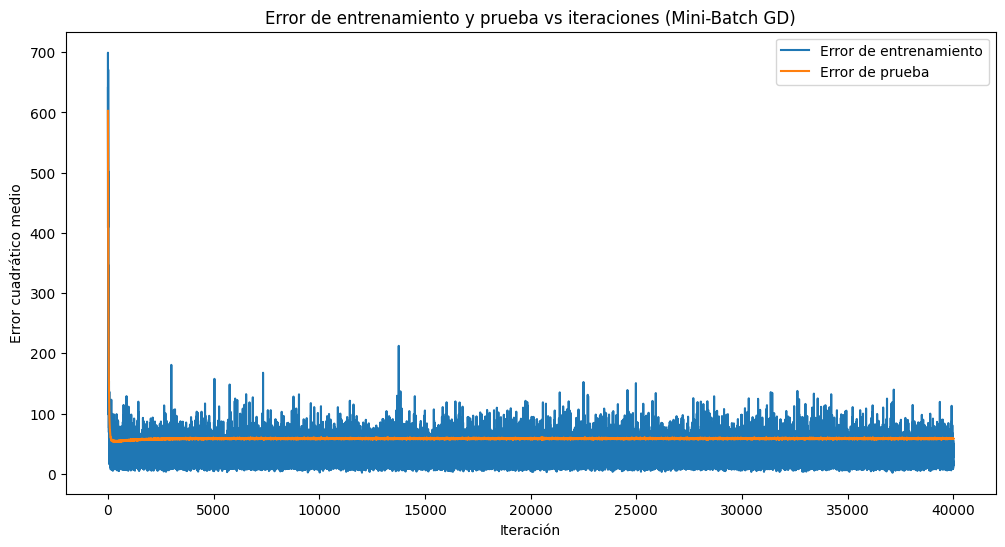

MSE de entrenamiento final: 20.01756068751499
RMSE entrenamiento final: 4.474098868768435
R2 entrenamiento final: 0.6760699250397211

MSE de prueba final: 58.57708010566457
RMSE de prueba final: 7.653566495802108
R2 de prueba final: 0.4392701860365481


array([[22.78565562],
       [-1.39895658],
       [ 0.46303257],
       [ 0.52067643],
       [ 1.00406117],
       [-0.58246308],
       [ 3.57474693],
       [-0.95719776],
       [-2.68687184],
       [ 4.24895092],
       [-4.35236226],
       [-2.37139967],
       [ 0.83965324],
       [-2.71687133]])

In [646]:
mini_batch_gradient_descent(X_train_gd, y_train_gd, X_val_gd, y_val_gd, lr=0.01, epochs=2000, batch_size=batch_size)

Se observa que con este tratamiento de los datos con una ratio de aprendizaje de 0.1 (el doble del valor de divergencia de la Opción 1) el modelo no diverge.

## **Ridge**

In [647]:
modelo = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-3, 6, 200),
                           fit_intercept   = True,
                           store_cv_values = True,
                        )
         )

_ = modelo.fit(X_train_op2, y_train_op2)

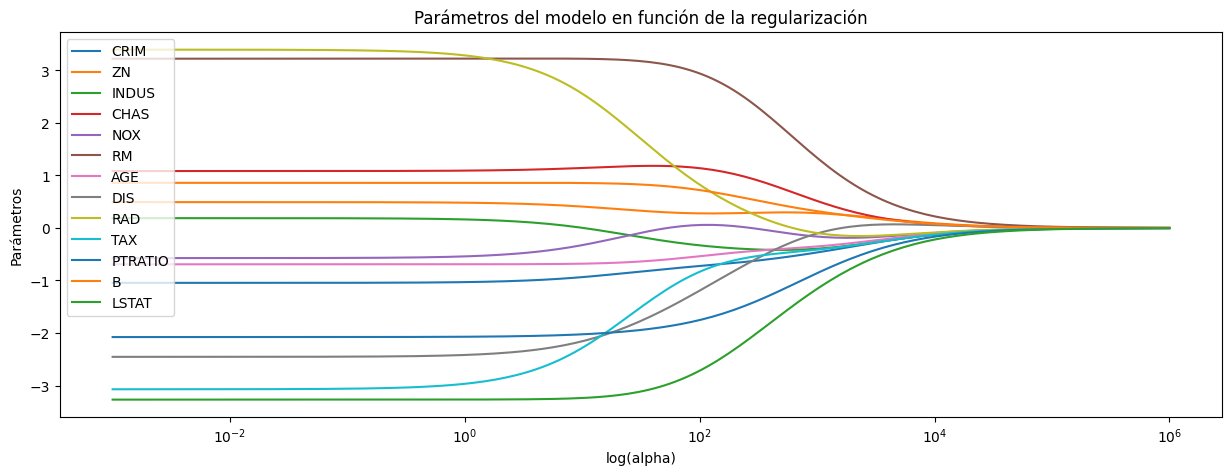

In [648]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train_op2, y_train_op2)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train_op2.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

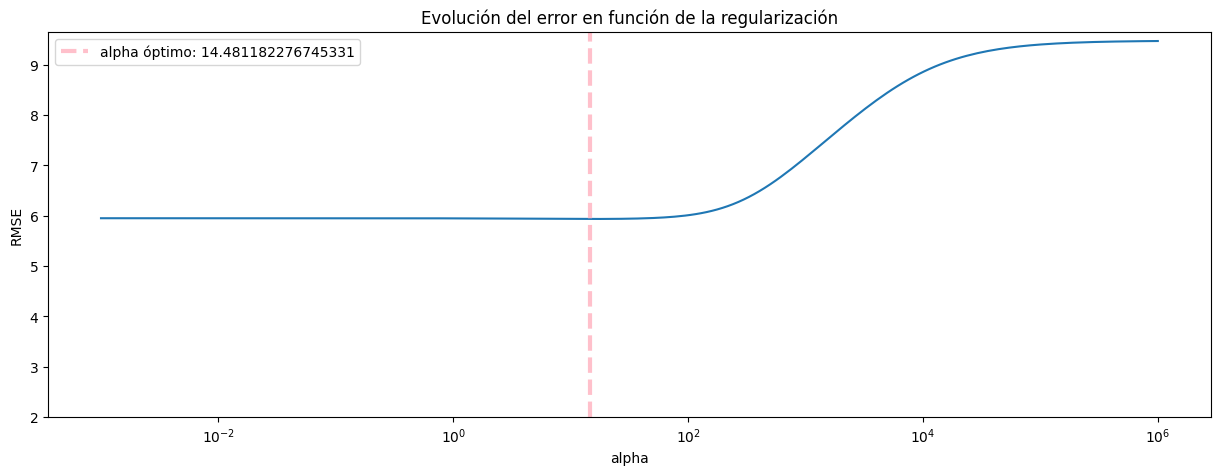

In [649]:
# Evolución del error de validación cruzada en función de alpha
# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]
mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)
min_mse_cv = np.min(mse_cv)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse = np.min(rmse_cv)
optimo = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
plt.axvline(optimo,color='pink',label =f'alpha óptimo: {optimo}',ls='--', linewidth=3)
ax.legend()
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [650]:
# Mejor valor alpha

print(f"Mínimo valor de rmse: {min_rmse}")
print(f"Mejor valor de alpha encontrado: {optimo}")

Mínimo valor de rmse: 5.936218284490992
Mejor valor de alpha encontrado: 14.481182276745331


Text(0.5, 1.0, 'Parámetros del modelo')

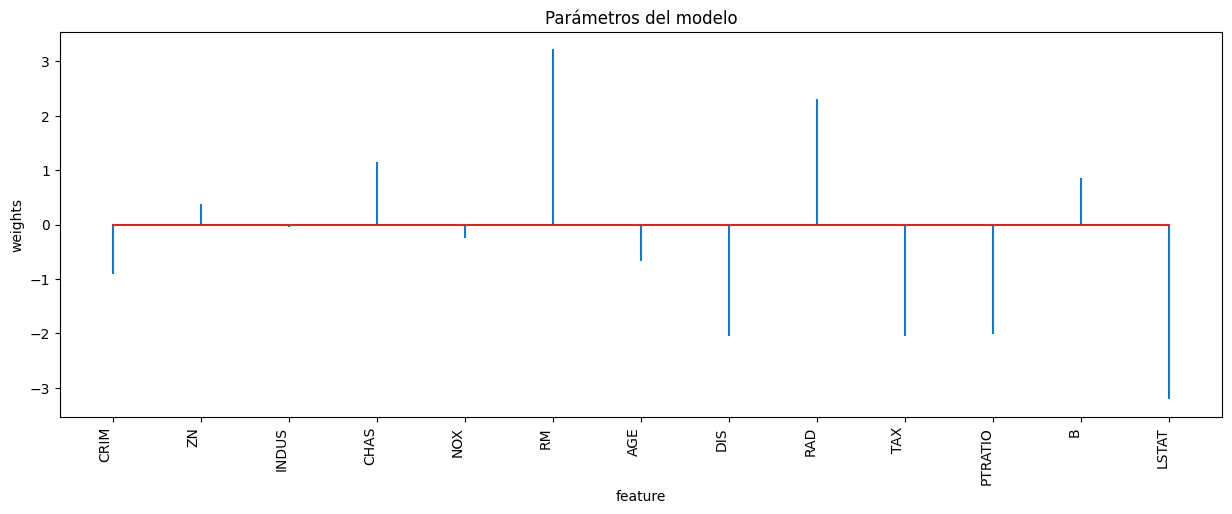

In [651]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame({'predictor': X_train_op2.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [652]:
df_coeficientes

predictor      coef
0       CRIM -0.904025
1         ZN  0.383448
2      INDUS -0.049811
3       CHAS  1.157360
4        NOX -0.254882
5         RM  3.216794
6        AGE -0.671668
7        DIS -2.056043
8        RAD  2.308053
9        TAX -2.053377
10   PTRATIO -2.005183
11         B  0.851972
12     LSTAT -3.215052

In [653]:
df_variables_anuladas = df_coeficientes[df_coeficientes.coef == 0]
if len(df_variables_anuladas)==0:
    print('Ridge no anula ninguna variable explicativa')
else:
    print('Ridge anula estas variables explicativas:')
    for i,s in df_coeficientes[df_coeficientes.coef == 0].iterrows():
        variable_anulada = s['predictor']
        print(f'\t{variable_anulada}')

Ridge no anula ninguna variable explicativa


In [654]:
# Predicciones

y_pred_ridge = modelo.predict(X_test_op2)

In [655]:
# Testeo

mse_ridge = mean_squared_error(y_test_op2,
                y_pred_ridge,
                squared = True
             )
rmse_ridge = mean_squared_error(y_test_op2,
                y_pred_ridge,
                squared = False
             )
R2_ridge = metrics.r2_score(y_test_op2, y_pred_ridge)

print("\nMétricas en el conjunto de testeo:")
print(f'Error Cuadrático Medio (MSE_op2): {round(mse_ridge, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE_op2): {round(rmse_ridge, 3)}')
print(f'Coeficiente de Determinación (R^2_op2): {round(R2_ridge, 3)}')


Métricas en el conjunto de testeo:
Error Cuadrático Medio (MSE_op2): 50.746
Raíz Error Cuadrático Medio (RMSE_op2): 7.124
Coeficiente de Determinación (R^2_op2): 0.428


## **Lasso**

In [656]:
modelo = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-3, 6, 200),
                           cv=5
                        )
         )

_ = modelo.fit(X_train_op2, y_train_op2)

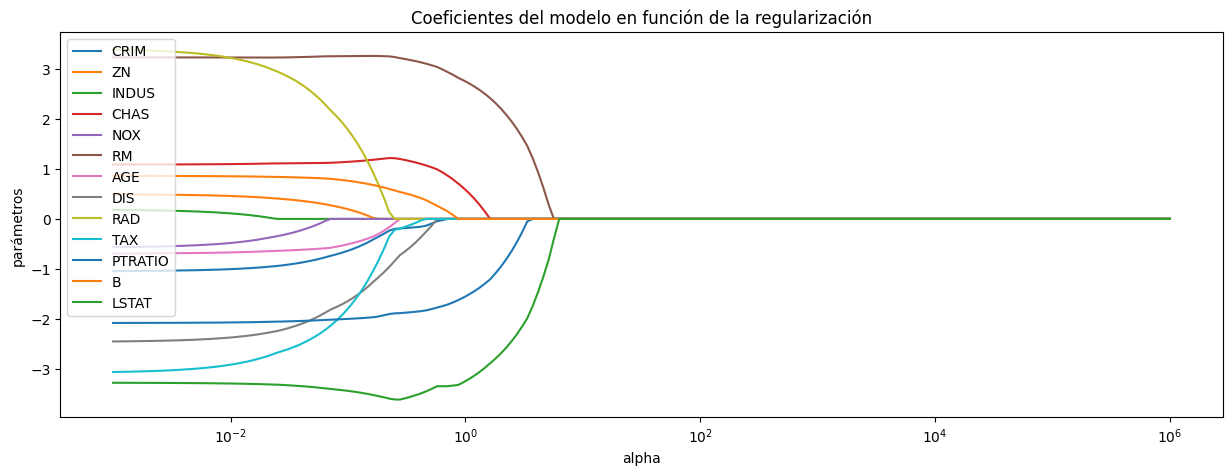

In [657]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train_op2, y_train_op2)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
# ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

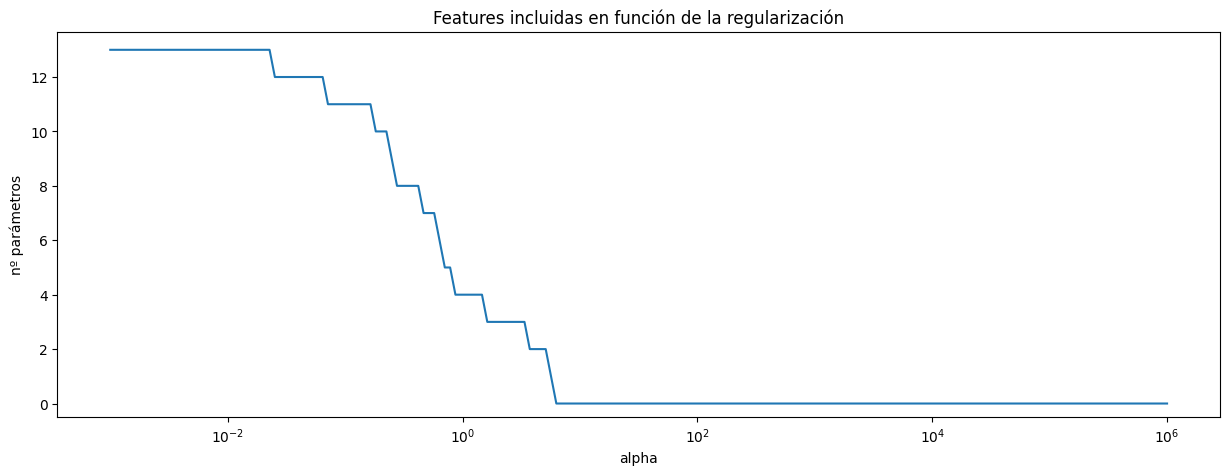

In [658]:
# Número de features incluidas (parámetros !=0) en función de alpha

alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train_op2, y_train_op2)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

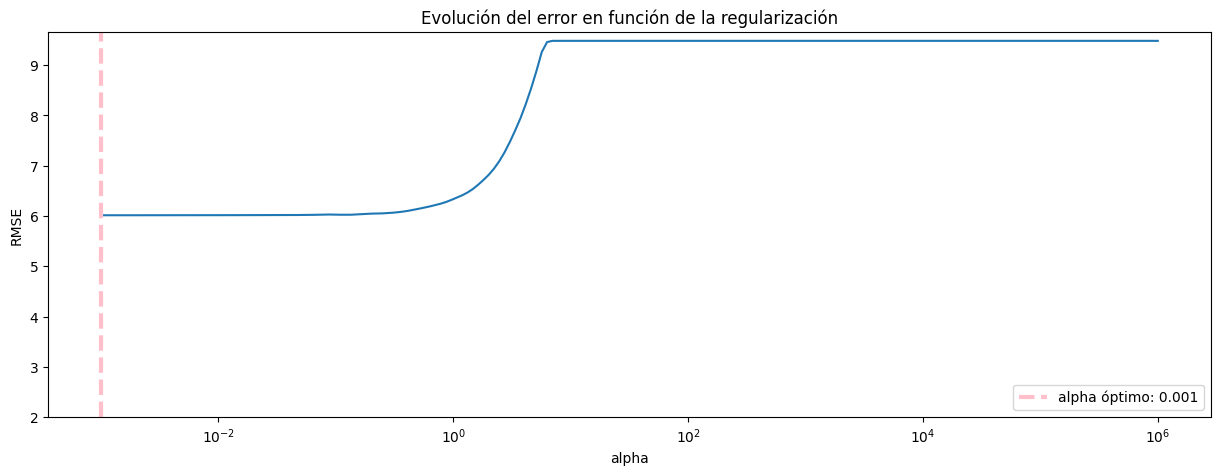

In [659]:
# Evolución del error de validación cruzada en función de alpha
# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
plt.axvline(optimo,color='pink',label =f'alpha óptimo: {optimo}',ls='--', linewidth=3)
ax.legend()
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [660]:
# Mejor valor alpha

print(f"Mínimo valor de rmse: {min_rmse}")
print(f"Mejor valor de alpha encontrado: {optimo}")

Mínimo valor de rmse: 6.013261090987375
Mejor valor de alpha encontrado: 0.001


Text(0.5, 1.0, 'Parámetros del modelo')

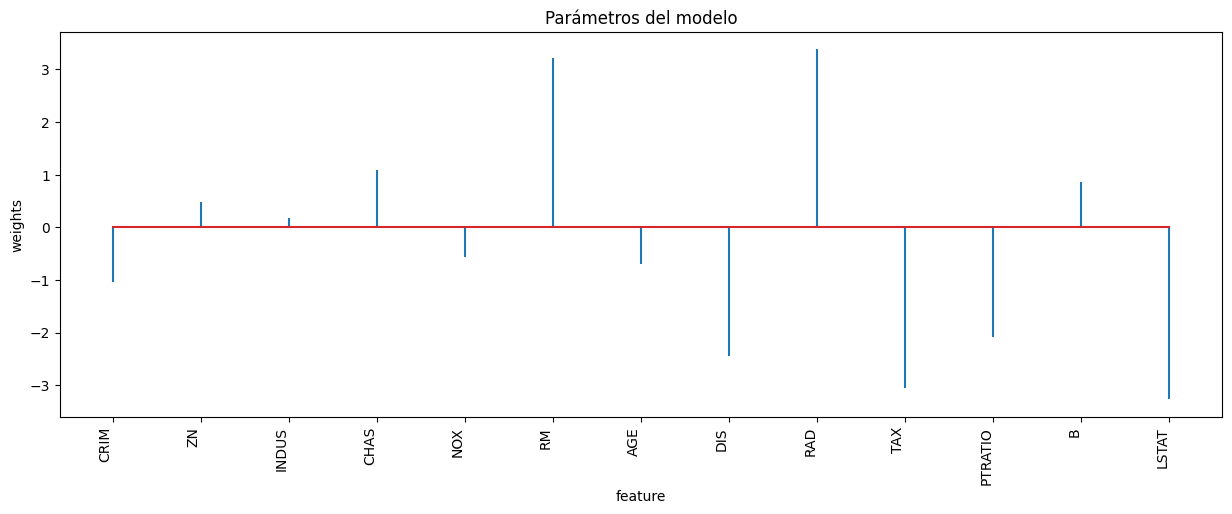

In [661]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train_op2.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [662]:
df_coeficientes

predictor      coef
0       CRIM -1.041138
1         ZN  0.489545
2      INDUS  0.180029
3       CHAS  1.084740
4        NOX -0.564430
5         RM  3.223207
6        AGE -0.689678
7        DIS -2.445388
8        RAD  3.378235
9        TAX -3.055179
10   PTRATIO -2.076176
11         B  0.859002
12     LSTAT -3.270033

In [663]:
df_variables_anuladas = df_coeficientes[df_coeficientes.coef == 0]
if len(df_variables_anuladas)==0:
    print('Lasso no anula ninguna variable explicativa')
else:
    print('Lasso anula estas variables explicativas:')
    for i,s in df_coeficientes[df_coeficientes.coef == 0].iterrows():
        variable_anulada = s['predictor']
        print(f'\t{variable_anulada}')

Lasso no anula ninguna variable explicativa


In [664]:
# Predicciones

y_pred_lasso = modelo.predict(X_test_op2)

In [665]:
# Testeo

mse_lasso = mean_squared_error(y_test_op2,
                y_pred_lasso,
                squared = True
             )
rmse_lasso = mean_squared_error(y_test_op2,
                y_pred_lasso,
                squared = False
             )
R2_lasso = metrics.r2_score(y_test_op2, y_pred_lasso)

print("\nMétricas en el conjunto de testeo:")
print(f'Error Cuadrático Medio (MSE_op2): {round(mse_lasso, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE_op2): {round(rmse_lasso, 3)}')
print(f'Coeficiente de Determinación (R^2_op2): {round(R2_lasso, 3)}')


Métricas en el conjunto de testeo:
Error Cuadrático Medio (MSE_op2): 57.015
Raíz Error Cuadrático Medio (RMSE_op2): 7.551
Coeficiente de Determinación (R^2_op2): 0.357


## **ElasticNet**

In [666]:
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-3, 6, 200),
                              cv              = 5
                           )
         )

_ = modelo.fit(X_train_op2, y_train_op2)

mod = modelo.steps[1][1]

In [667]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio

mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

l1_ratio     mod.alphas_     mse_cv   rmse_cv
157       0.0        0.079341  35.862328  5.988516
158       0.0        0.071494  35.862518  5.988532
159       0.0        0.064424  35.865915  5.988816
156       0.0        0.088049  35.866185  5.988838
357       0.1        0.079341  35.870724  5.989217
..        ...             ...        ...       ...
602       0.7   811984.499318  89.883659  9.480699
601       0.7   901101.825167  89.883659  9.480699
600       0.7  1000000.000000  89.883659  9.480699
507       0.5       14.481182  89.883659  9.480699
699       0.7       33.312948  89.883659  9.480699

[1400 rows x 4 columns]

Text(0, 0.5, 'rmse_cv')

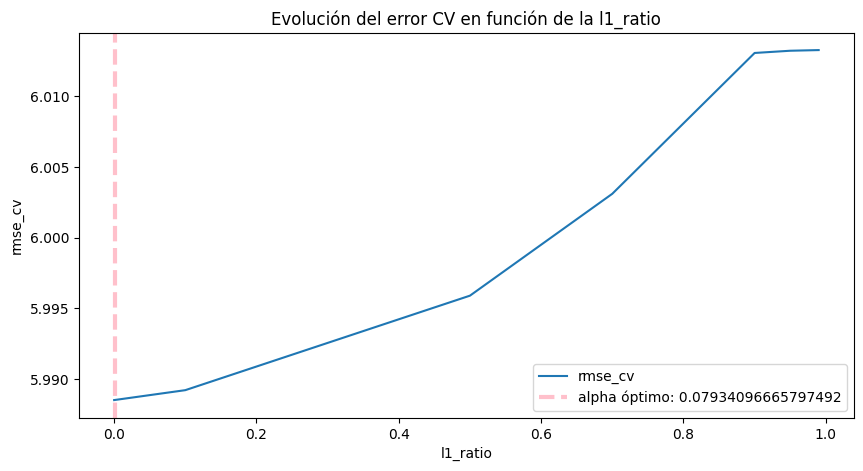

In [668]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
plt.axvline(optimo,color='pink',label =f'alpha óptimo: {mod.alpha_}',ls='--', linewidth=3)
ax.legend()
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv')

In [669]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod.l1_ratio_}")

Mejor valor de alpha encontrado: 0.07934096665797492
Mejor valor de l1_ratio encontrado: 0.0


Text(0.5, 1.0, 'Parámetros del modelo')

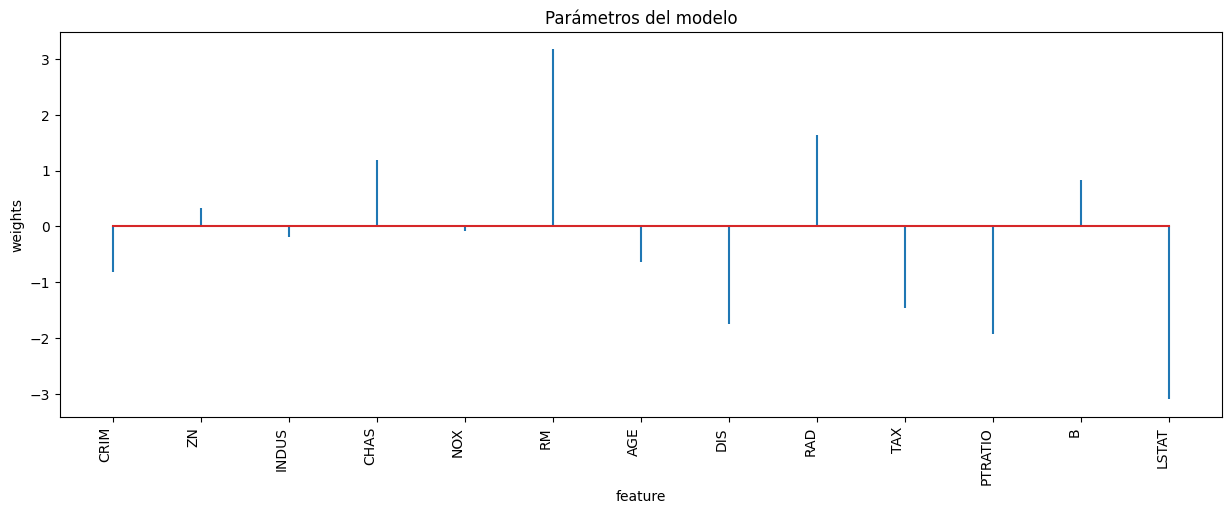

In [670]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train_op2.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

In [671]:
df_coeficientes

predictor      coef
0       CRIM -0.822774
1         ZN  0.324096
2      INDUS -0.184177
3       CHAS  1.182376
4        NOX -0.079716
5         RM  3.171426
6        AGE -0.634069
7        DIS -1.743683
8        RAD  1.646966
9        TAX -1.467542
10   PTRATIO -1.935040
11         B  0.825015
12     LSTAT -3.101255

In [672]:
df_variables_anuladas = df_coeficientes[df_coeficientes.coef == 0]
if len(df_variables_anuladas)==0:
    print('Elastic-net no anula ninguna variable explicativa')
else:
    print('Elastic-net anula estas variables explicativas:')
    for i,s in df_coeficientes[df_coeficientes.coef == 0].iterrows():
        variable_anulada = s['predictor']
        print(f'\t{variable_anulada}')

Elastic-net no anula ninguna variable explicativa


In [673]:
# Predicciones

y_pred_elastic = modelo.predict(X_test_op2)

In [674]:
# Testeo

mse_elastic = mean_squared_error(y_test_op2,
                y_pred_elastic,
                squared = True
             )
rmse_elastic = mean_squared_error(y_test_op2,
                y_pred_elastic,
                squared = False
             )
R2_elastic = metrics.r2_score(y_test_op2, y_pred_elastic)

print("\nMétricas en el conjunto de testeo:")
print(f'Error Cuadrático Medio (MSE_op2): {round(mse_elastic, 3)}')
print(f'Raíz Error Cuadrático Medio (RMSE_op2): {round(rmse_elastic, 3)}')
print(f'Coeficiente de Determinación (R^2_op2): {round(R2_elastic, 3)}')


Métricas en el conjunto de testeo:
Error Cuadrático Medio (MSE_op2): 47.168
Raíz Error Cuadrático Medio (RMSE_op2): 6.868
Coeficiente de Determinación (R^2_op2): 0.468


## **Comparación de modelos de regresión**

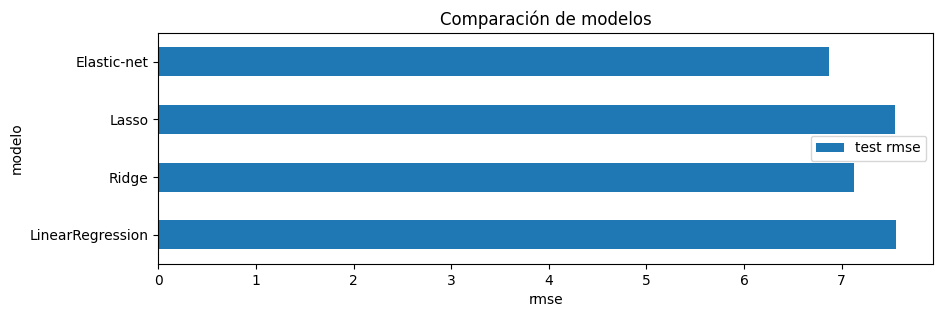

In [675]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_op2, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [676]:
# Validación cruzada train

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Validación cruzada para Ridge
scores_ridge = cross_val_score(ridge, X_train_scaled_op2, y_train_op2, cv=5)
print("Ridge - Puntuaciones de validación cruzada (R2 score):", scores_ridge)
print(f"Media de las puntuaciones (Ridge): {scores_ridge.mean():.2f}")
print(f"Desvío Estándar de las puntuaciones (Ridge): {scores_ridge.std():.2f}")

# Validación cruzada para Lasso
scores_lasso = cross_val_score(lasso, X_train_scaled_op2, y_train_op2, cv=5)
print("\nLasso - Puntuaciones de validación cruzada (R2 score):", scores_lasso)
print(f"Media de las puntuaciones (Lasso): {scores_lasso.mean():.2f}")
print(f"Desvío Estándar de las puntuaciones (Lasso): {scores_lasso.std():.2f}")

# Validación cruzada para Elastic Net
scores_elastic_net = cross_val_score(elastic_net, X_train_scaled_op2, y_train_op2, cv=5)
print("\nElastic Net - Puntuaciones de validación cruzada (R2 score):", scores_elastic_net)
print(f"Media de las puntuaciones (Elastic Net): {scores_elastic_net.mean():.2f}")
print(f"Desvío Estándar de las puntuaciones (Elastic Net): {scores_elastic_net.std():.2f}")

Ridge - Puntuaciones de validación cruzada (R2 score): [0.41187171 0.35133285 0.73599463 0.71215823 0.71460368]
Media de las puntuaciones (Ridge): 0.59
Desvío Estándar de las puntuaciones (Ridge): 0.17

Lasso - Puntuaciones de validación cruzada (R2 score): [0.41892654 0.33691182 0.74260638 0.72044918 0.70050398]
Media de las puntuaciones (Lasso): 0.58
Desvío Estándar de las puntuaciones (Lasso): 0.17

Elastic Net - Puntuaciones de validación cruzada (R2 score): [0.43145527 0.35797506 0.74091417 0.71715943 0.69436921]
Media de las puntuaciones (Elastic Net): 0.59
Desvío Estándar de las puntuaciones (Elastic Net): 0.16


In [677]:
df_comparacion = pd.DataFrame({
    'LinearReggresion':[rmse_op2,r2_op2],
    'Ridge':[rmse_ridge,R2_ridge],
    'Lasso':[rmse_lasso,R2_lasso],
    'Elastic-net':[rmse_elastic,R2_elastic],
},index=['rmse','R^2'])
df_comparacion

LinearReggresion     Ridge     Lasso  Elastic-net
rmse          7.560116  7.123611  7.550799     6.867870
R^2           0.355816  0.428056  0.357402     0.468385

In [678]:
mejor_modelo_rmse = df_comparacion.loc['rmse'].sort_values().index[0]
mejor_modelo_r2 = df_comparacion.loc['R^2'].sort_values(ascending=False).index[0]
if (mejor_modelo_rmse==mejor_modelo_r2):
  print(f'Siguiendo las métricas rmse y R^2, el modelo más robusto es aportado por {mejor_modelo_rmse}')
else:
  print(f'Siguiendo la métrica de rmse, el modelo más robusto es aportado por {mejor_modelo_rmse}.\nEn cambio, siguiendo la métrica de R^2, el modelo más robusto es aportado por {mejor_modelo_r2}')

Siguiendo las métricas rmse y R^2, el modelo más robusto es aportado por Elastic-net


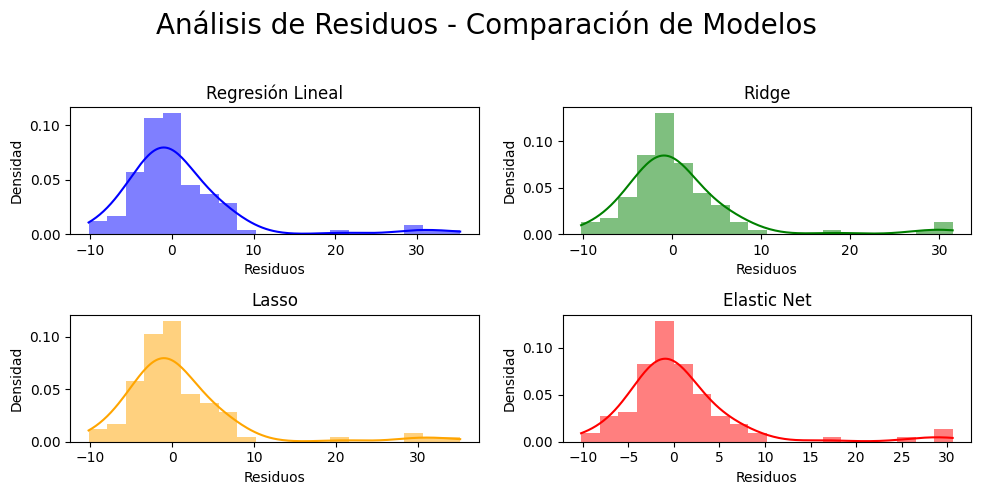

In [679]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Análisis de Residuos - Comparación de Modelos', fontsize=20)

# Subplot para regresión lineal
sns.histplot((y_test_op2 - y_pred_op2), color="blue", kde=True, stat="density", linewidth=0, bins=20, ax=axs[0, 0])
axs[0, 0].set_title("Regresión Lineal")
axs[0, 0].set_xlabel('Residuos')
axs[0, 0].set_ylabel('Densidad')

# Subplot para Ridge
sns.histplot((y_test_op2 - y_pred_ridge), color="green", kde=True, stat="density", linewidth=0, bins=20, ax=axs[0, 1])
axs[0, 1].set_title("Ridge")
axs[0, 1].set_xlabel('Residuos')
axs[0, 1].set_ylabel('Densidad')

# Subplot para Lasso
sns.histplot((y_test_op2 - y_pred_lasso), color="orange", kde=True, stat="density", linewidth=0, bins=20, ax=axs[1, 0])
axs[1, 0].set_title("Lasso")
axs[1, 0].set_xlabel('Residuos')
axs[1, 0].set_ylabel('Densidad')

# Subplot para Elastic Net
sns.histplot((y_test_op2 - y_pred_elastic), color="red", kde=True, stat="density", linewidth=0, bins=20, ax=axs[1, 1])
axs[1, 1].set_title("Elastic Net")
axs[1, 1].set_xlabel('Residuos')
axs[1, 1].set_ylabel('Densidad')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

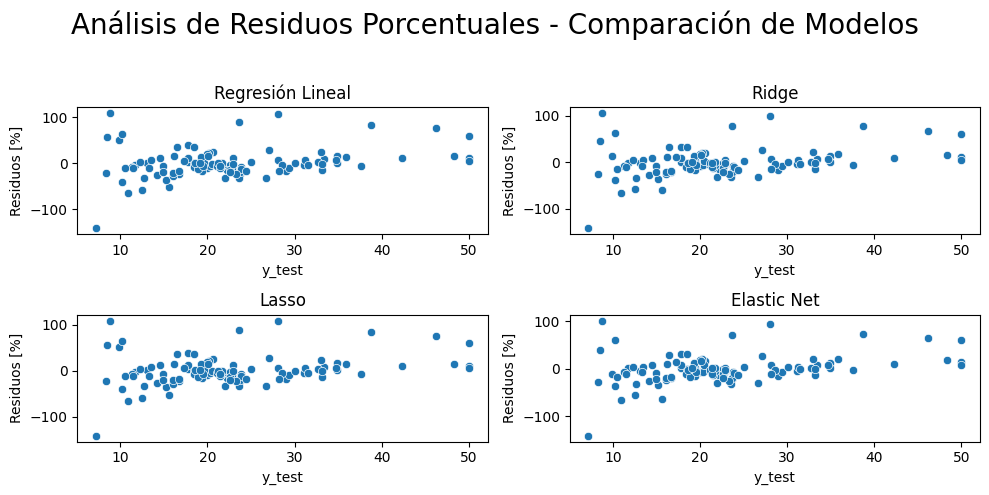

In [680]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Análisis de Residuos Porcentuales - Comparación de Modelos', fontsize=20)

# Subplot para regresión lineal
sns.scatterplot(x=y_test_op2, y=100*(y_test_op2-y_pred_op2)/y_test_op2, ax=axs[0, 0])
axs[0, 0].set_title("Regresión Lineal")
axs[0, 0].set_xlabel('y_test')
axs[0, 0].set_ylabel('Residuos [%]')

# Subplot para Ridge
sns.scatterplot(x=y_test_op2, y=100*(y_test_op2-y_pred_ridge)/y_test_op2, ax=axs[0, 1])
axs[0, 1].set_title("Ridge")
axs[0, 1].set_xlabel('y_test')
axs[0, 1].set_ylabel('Residuos [%]')

# Subplot para Lasso
sns.scatterplot(x=y_test_op2, y=100*(y_test_op2-y_pred_lasso)/y_test_op2, ax=axs[1, 0])
axs[1, 0].set_title("Lasso")
axs[1, 0].set_xlabel('y_test')
axs[1, 0].set_ylabel('Residuos [%]')

# Subplot para Elastic Net
sns.scatterplot(x=y_test_op2, y=100*(y_test_op2-y_pred_elastic)/y_test_op2, ax=axs[1, 1])
axs[1, 1].set_title("Elastic Net")
axs[1, 1].set_xlabel('y_test')
axs[1, 1].set_ylabel('Residuos [%]')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

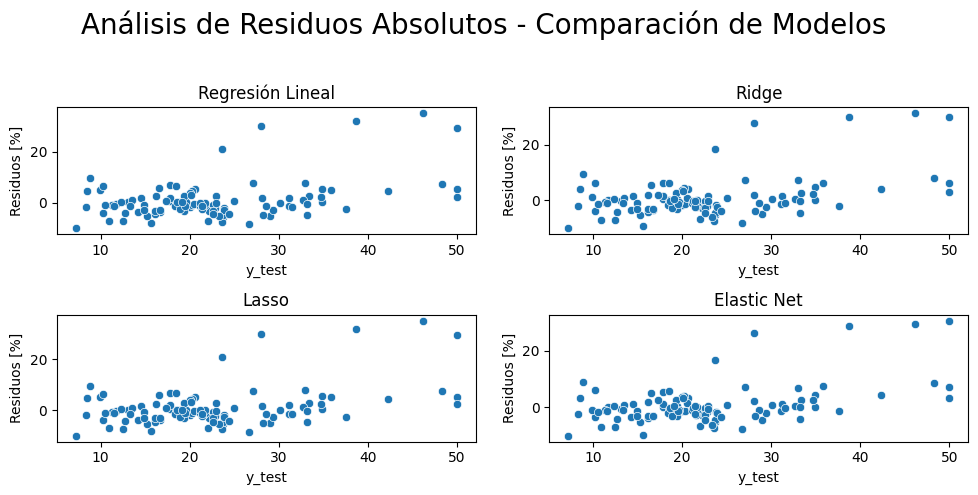

In [681]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Análisis de Residuos Absolutos - Comparación de Modelos', fontsize=20)

# Subplot para regresión lineal
sns.scatterplot(x=y_test_op2, y=(y_test_op2-y_pred_op2), ax=axs[0, 0])
axs[0, 0].set_title("Regresión Lineal")
axs[0, 0].set_xlabel('y_test')
axs[0, 0].set_ylabel('Residuos [%]')

# Subplot para Ridge
sns.scatterplot(x=y_test_op2, y=(y_test_op2-y_pred_ridge), ax=axs[0, 1])
axs[0, 1].set_title("Ridge")
axs[0, 1].set_xlabel('y_test')
axs[0, 1].set_ylabel('Residuos [%]')

# Subplot para Lasso
sns.scatterplot(x=y_test_op2, y=(y_test_op2-y_pred_lasso), ax=axs[1, 0])
axs[1, 0].set_title("Lasso")
axs[1, 0].set_xlabel('y_test')
axs[1, 0].set_ylabel('Residuos [%]')

# Subplot para Elastic Net
sns.scatterplot(x=y_test_op2, y=(y_test_op2-y_pred_elastic), ax=axs[1, 1])
axs[1, 1].set_title("Elastic Net")
axs[1, 1].set_xlabel('y_test')
axs[1, 1].set_ylabel('Residuos [%]')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Conclusiones**

Se evalúan dos opciones:
  * Opción 1: sin tratamiento de los outliers y con escalado robusto.
  * Opción 2: con tratamiento de los outliers imputando su valor con KNN y escalado estándar.
  En esta última opción se probaron dos criterios para la detección de los valores atípicos:

    * intervalo [Q1 - 1,5 * RI, Q3 + 1,5 * RI]
    * intervalo [percentil(0.03), percentil(0.97)].
    
    Elegimos este último criterio porque los resultados obtenidos fueron marcadamente mejores.
    
    Para el intervalo [percentil(0.01), percentil(0.99)] (imputando menos outliers) las métricas dan mejor pero Lasso y Elastic-net no eliminan ninguna variable.
    
    Para el intervalo [percentil(0.05), percentil(0.95)] (imputando más outliers) el R^2 da negativo por lo que el resultado obtenido es peor que predecir por la media.


Se observa que el mejor criterio es entrenar el modelo incluyendo los outliers.

Esto se ve tanto en la Opción 1, como en la selección del intervalo en la Opción 2.

No todas las variables explicativas presentan valores atípicos, pero en aquellas que sí los contienen, éstos son numerosos y es necesario que sean contemplados para el entrenamiento permitiendo una correcta predicción de la target.

Se utilizan las métricas rmse y R^2 para evaluar los modelos.

En ambos casos el mejor modelo encontrado es utilizando la regularización Elastic-net.


---


En conclusión, entre todos los modelos probados, se elige la Opción 1 con Elastic-net:
 * Tratamiento particular de los valores faltantes para cada variable.
 * Sin tratamiento de los valores atípicos.
 * Escalado robusto por ser menos sensible a la presencia de outliers.
 * Regularización Elastic-net con validación cruzada para dar robutez a un modelo con outliers. Esta regularización obtiene los mejores valores de rmse y R^2, comparativamente.

